In [331]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
import bubbly
import seaborn as sns
import os
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.utils import resample
from sklearn.linear_model import LogisticRegression
from scipy import stats
from sklearn.decomposition import PCA
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier, ExtraTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import AdaBoostClassifier, BaggingClassifier
from sklearn.linear_model import RidgeClassifier, SGDClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, make_scorer, accuracy_score
import ydata_profiling
import sweetviz
import autoviz
import mlflow
import dvc
import dagshub
%matplotlib inline

In [7]:
pwd

'c:\\Users\\Arpit Kadam\\Desktop\\Insurance-Fraud-Detection\\research'

In [8]:
cd ..

c:\Users\Arpit Kadam\Desktop\Insurance-Fraud-Detection


In [9]:
cd data

c:\Users\Arpit Kadam\Desktop\Insurance-Fraud-Detection\data


In [205]:
cd C:\Users\Arpit Kadam\Desktop\Insurance-Fraud-Detection\data

C:\Users\Arpit Kadam\Desktop\Insurance-Fraud-Detection\data


In [206]:
df = pd.read_csv('insurance_claims.csv')

In [43]:
cd ..


c:\Users\Arpit Kadam\Desktop\Insurance-Fraud-Detection


In [44]:
cd research


c:\Users\Arpit Kadam\Desktop\Insurance-Fraud-Detection\research


In [45]:
cd research-text-files


c:\Users\Arpit Kadam\Desktop\Insurance-Fraud-Detection\research\research-text-files


In [14]:
print("\
First few rows:")
df.head()

First few rows:


,months_as_customer,age,policy_number,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,insured_sex,insured_education_level,insured_occupation,insured_hobbies,insured_relationship,capital-gains,capital-loss,incident_date,incident_type,collision_type,incident_severity,authorities_contacted,incident_state,incident_city,incident_location,incident_hour_of_the_day,number_of_vehicles_involved,property_damage,bodily_injuries,witnesses,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported
0,328,48,521585,2014-10-17,OH,250/500,1000,1406.91,0,466132,MALE,MD,craft-repair,sleeping,husband,53300,0,2015-01-25,Single Vehicle Collision,Side Collision,Major Damage,Police,SC,Columbus,9935 4th Drive,5,1,YES,1,2,YES,71610,6510,13020,52080,Saab,92x,2004,Y
1,228,42,342868,2006-06-27,IN,250/500,2000,1197.22,5000000,468176,MALE,MD,machine-op-inspct,reading,other-relative,0,0,2015-01-21,Vehicle Theft,?,Minor Damage,Police,VA,Riverwood,6608 MLK Hwy,8,1,?,0,0,?,5070,780,780,3510,Mercedes,E400,2007,Y
2,134,29,687698,2000-09-06,OH,100/300,2000,1413.14,5000000,430632,FEMALE,PhD,sales,board-games,own-child,35100,0,2015-02-22,Multi-vehicle Collision,Rear Collision,Minor Damage,Police,NY,Columbus,7121 Francis Lane,7,3,NO,2,3,NO,34650,7700,3850,23100,Dodge,RAM,2007,N
3,256,41,227811,1990-05-25,IL,250/500,2000,1415.74,6000000,608117,FEMALE,PhD,armed-forces,board-games,unmarried,48900,-62400,2015-01-10,Single Vehicle Collision,Front Collision,Major Damage,Police,OH,Arlington,6956 Maple Drive,5,1,?,1,2,NO,63400,6340,6340,50720,Chevrolet,Tahoe,2014,Y
4,228,44,367455,2014-06-06,IL,500/1000,1000,1583.91,6000000,610706,MALE,Associate,sales,board-games,unmarried,66000,-46000,2015-02-17,Vehicle Theft,?,Minor Damage,NaN,NY,Arlington,3041 3rd Ave,20,1,NO,0,1,NO,6500,1300,650,4550,Accura,RSX,2009,N


In [12]:
print("\
Basic Information:")
print(df.info())

Basic Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 39 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   months_as_customer           1000 non-null   int64  
 1   age                          1000 non-null   int64  
 2   policy_number                1000 non-null   int64  
 3   policy_bind_date             1000 non-null   object 
 4   policy_state                 1000 non-null   object 
 5   policy_csl                   1000 non-null   object 
 6   policy_deductable            1000 non-null   int64  
 7   policy_annual_premium        1000 non-null   float64
 8   umbrella_limit               1000 non-null   int64  
 9   insured_zip                  1000 non-null   int64  
 10  insured_sex                  1000 non-null   object 
 11  insured_education_level      1000 non-null   object 
 12  insured_occupation           1000 non-null   object 
 13  

In [15]:
print("\
Basic Statistics:")
df.describe()

Basic Statistics:


,months_as_customer,age,policy_number,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,capital-gains,capital-loss,incident_hour_of_the_day,number_of_vehicles_involved,bodily_injuries,witnesses,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_year
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1.000000e+03,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.000000,1000.000000
mean,203.954000,38.948000,546238.648000,1136.000000,1256.406150,1.101000e+06,501214.488000,25126.100000,-26793.700000,11.644000,1.83900,0.992000,1.487000,52761.94000,7433.420000,7399.570000,37928.950000,2005.103000
std,115.113174,9.140287,257063.005276,611.864673,244.167395,2.297407e+06,71701.610941,27872.187708,28104.096686,6.951373,1.01888,0.820127,1.111335,26401.53319,4880.951853,4824.726179,18886.252893,6.015861
min,0.000000,19.000000,100804.000000,500.000000,433.330000,-1.000000e+06,430104.000000,0.000000,-111100.000000,0.000000,1.00000,0.000000,0.000000,100.00000,0.000000,0.000000,70.000000,1995.000000
25%,115.750000,32.000000,335980.250000,500.000000,1089.607500,0.000000e+00,448404.500000,0.000000,-51500.000000,6.000000,1.00000,0.000000,1.000000,41812.50000,4295.000000,4445.000000,30292.500000,2000.000000
50%,199.500000,38.000000,533135.000000,1000.000000,1257.200000,0.000000e+00,466445.500000,0.000000,-23250.000000,12.000000,1.00000,1.000000,1.000000,58055.00000,6775.000000,6750.000000,42100.000000,2005.000000
75%,276.250000,44.000000,759099.750000,2000.000000,1415.695000,0.000000e+00,603251.000000,51025.000000,0.000000,17.000000,3.00000,2.000000,2.000000,70592.50000,11305.000000,10885.000000,50822.500000,2010.000000
max,479.000000,64.000000,999435.000000,2000.000000,2047.590000,1.000000e+07,620962.000000,100500.000000,0.000000,23.000000,4.00000,2.000000,3.000000,114920.00000,21450.000000,23670.000000,79560.000000,2015.000000


In [17]:
df.isnull().sum()

months_as_customer              0
age                             0
policy_number                   0
policy_bind_date                0
policy_state                    0
policy_csl                      0
policy_deductable               0
policy_annual_premium           0
umbrella_limit                  0
insured_zip                     0
insured_sex                     0
insured_education_level         0
insured_occupation              0
insured_hobbies                 0
insured_relationship            0
capital-gains                   0
capital-loss                    0
incident_date                   0
incident_type                   0
collision_type                  0
incident_severity               0
authorities_contacted          91
incident_state                  0
incident_city                   0
incident_location               0
incident_hour_of_the_day        0
number_of_vehicles_involved     0
property_damage                 0
bodily_injuries                 0
witnesses     

In [16]:
# Check for missing values
missing_values = df.isnull().sum()
print("Missing Values in Each Column:")
print(missing_values[missing_values > 0])

Missing Values in Each Column:
authorities_contacted    91
dtype: int64


In [18]:
df.duplicated().sum()

np.int64(0)

In [19]:
# Check for duplicate rows
duplicates = df.duplicated().sum()
print("\
Number of Duplicate Rows:", duplicates)

Number of Duplicate Rows: 0


In [53]:
with open('Unique_Values.txt', 'w') as f:
    f.write(f"Unique Values:\n")
    f.write(f"{df.nunique()}\n")
    f.write("\n" + "="*50 + "\n")

print("Unique Values saved to Unique_Values.txt")

Unique Values saved to Unique_Values.txt


In [50]:
with open('Basic_Statistics.txt', 'w') as f:
    f.write(f"First few rows:\n")
    f.write(f"{df.head()}\n")
    f.write("\n" + "="*50 + "\n")
    f.write(f"Basic Statistics:\n")
    f.write(f"{df.describe()}\n")
    f.write("\n" + "="*50 + "\n")
    f.write(f"Missing Values:\n")
    f.write(f"{df.isnull().sum()}\n")
    f.write("\n" + "="*50 + "\n")
    f.write(f"Duplicate Rows:\n")
    f.write(f"{df.duplicated().sum()}\n")
    f.write("\n" + "="*50 + "\n")
    f.write(f"Unique Values:\n")
    f.write(f"{df.nunique()}\n")
    f.write("\n" + "="*50 + "\n")
    f.write(f"Value Counts:\n")
    f.write(f"{df.value_counts()}\n")
    f.write("\n" + "="*50 + "\n")
    f.write(f"Top 3 Values:\n")
    f.write(f"{df.value_counts().head(3)}\n")
    f.write("\n" + "="*50 + "\n")
    f.write(f"Bottom 3 Values:\n")
    f.write(f"{df.value_counts().tail(3)}\n")
    f.write("\n" + "="*50 + "\n")

print("Statistics saved to numerical_statistics.txt")


Statistics saved to numerical_statistics.txt


In [52]:
# Save numerical statistics to a text file
with open('Numerical_Statistics.txt', 'w') as f:
    for col in numerical_columns:
        f.write(f"\nStatistics for {col}:\n")
        f.write(f"Skewness: {df[col].skew()}\n")
        f.write(f"Mean: {df[col].mean()}\n") 
        f.write(f"Median: {df[col].median()}\n")
        f.write(f"Standard Deviation: {df[col].std()}\n")
        f.write(f"Variance: {df[col].var()}\n")
        f.write(f"Minimum: {df[col].min()}\n")
        f.write(f"Maximum: {df[col].max()}\n")
        f.write(f"25th Percentile: {df[col].quantile(0.25)}\n")
        f.write(f"75th Percentile: {df[col].quantile(0.75)}\n")
        f.write(f"IQR: {df[col].quantile(0.75) - df[col].quantile(0.25)}\n")
        f.write(f"Range: {df[col].max() - df[col].min()}\n")
        f.write(f"Interquartile Range: {df[col].quantile(0.75) - df[col].quantile(0.25)}\n")
        f.write(f"Coefficient of Variation: {df[col].std() / df[col].mean()}\n")
        f.write(f"Kurtosis: {df[col].kurt()}\n")
        f.write("\n" + "="*50 + "\n")

print("Statistics saved to Numerical_Statistics.txt")

Statistics saved to Numerical_Statistics.txt


In [61]:
cd C:\Users\Arpit Kadam\Desktop\Insurance-Fraud-Detection\research\Visualization-Images

C:\Users\Arpit Kadam\Desktop\Insurance-Fraud-Detection\research\Visualization-Images


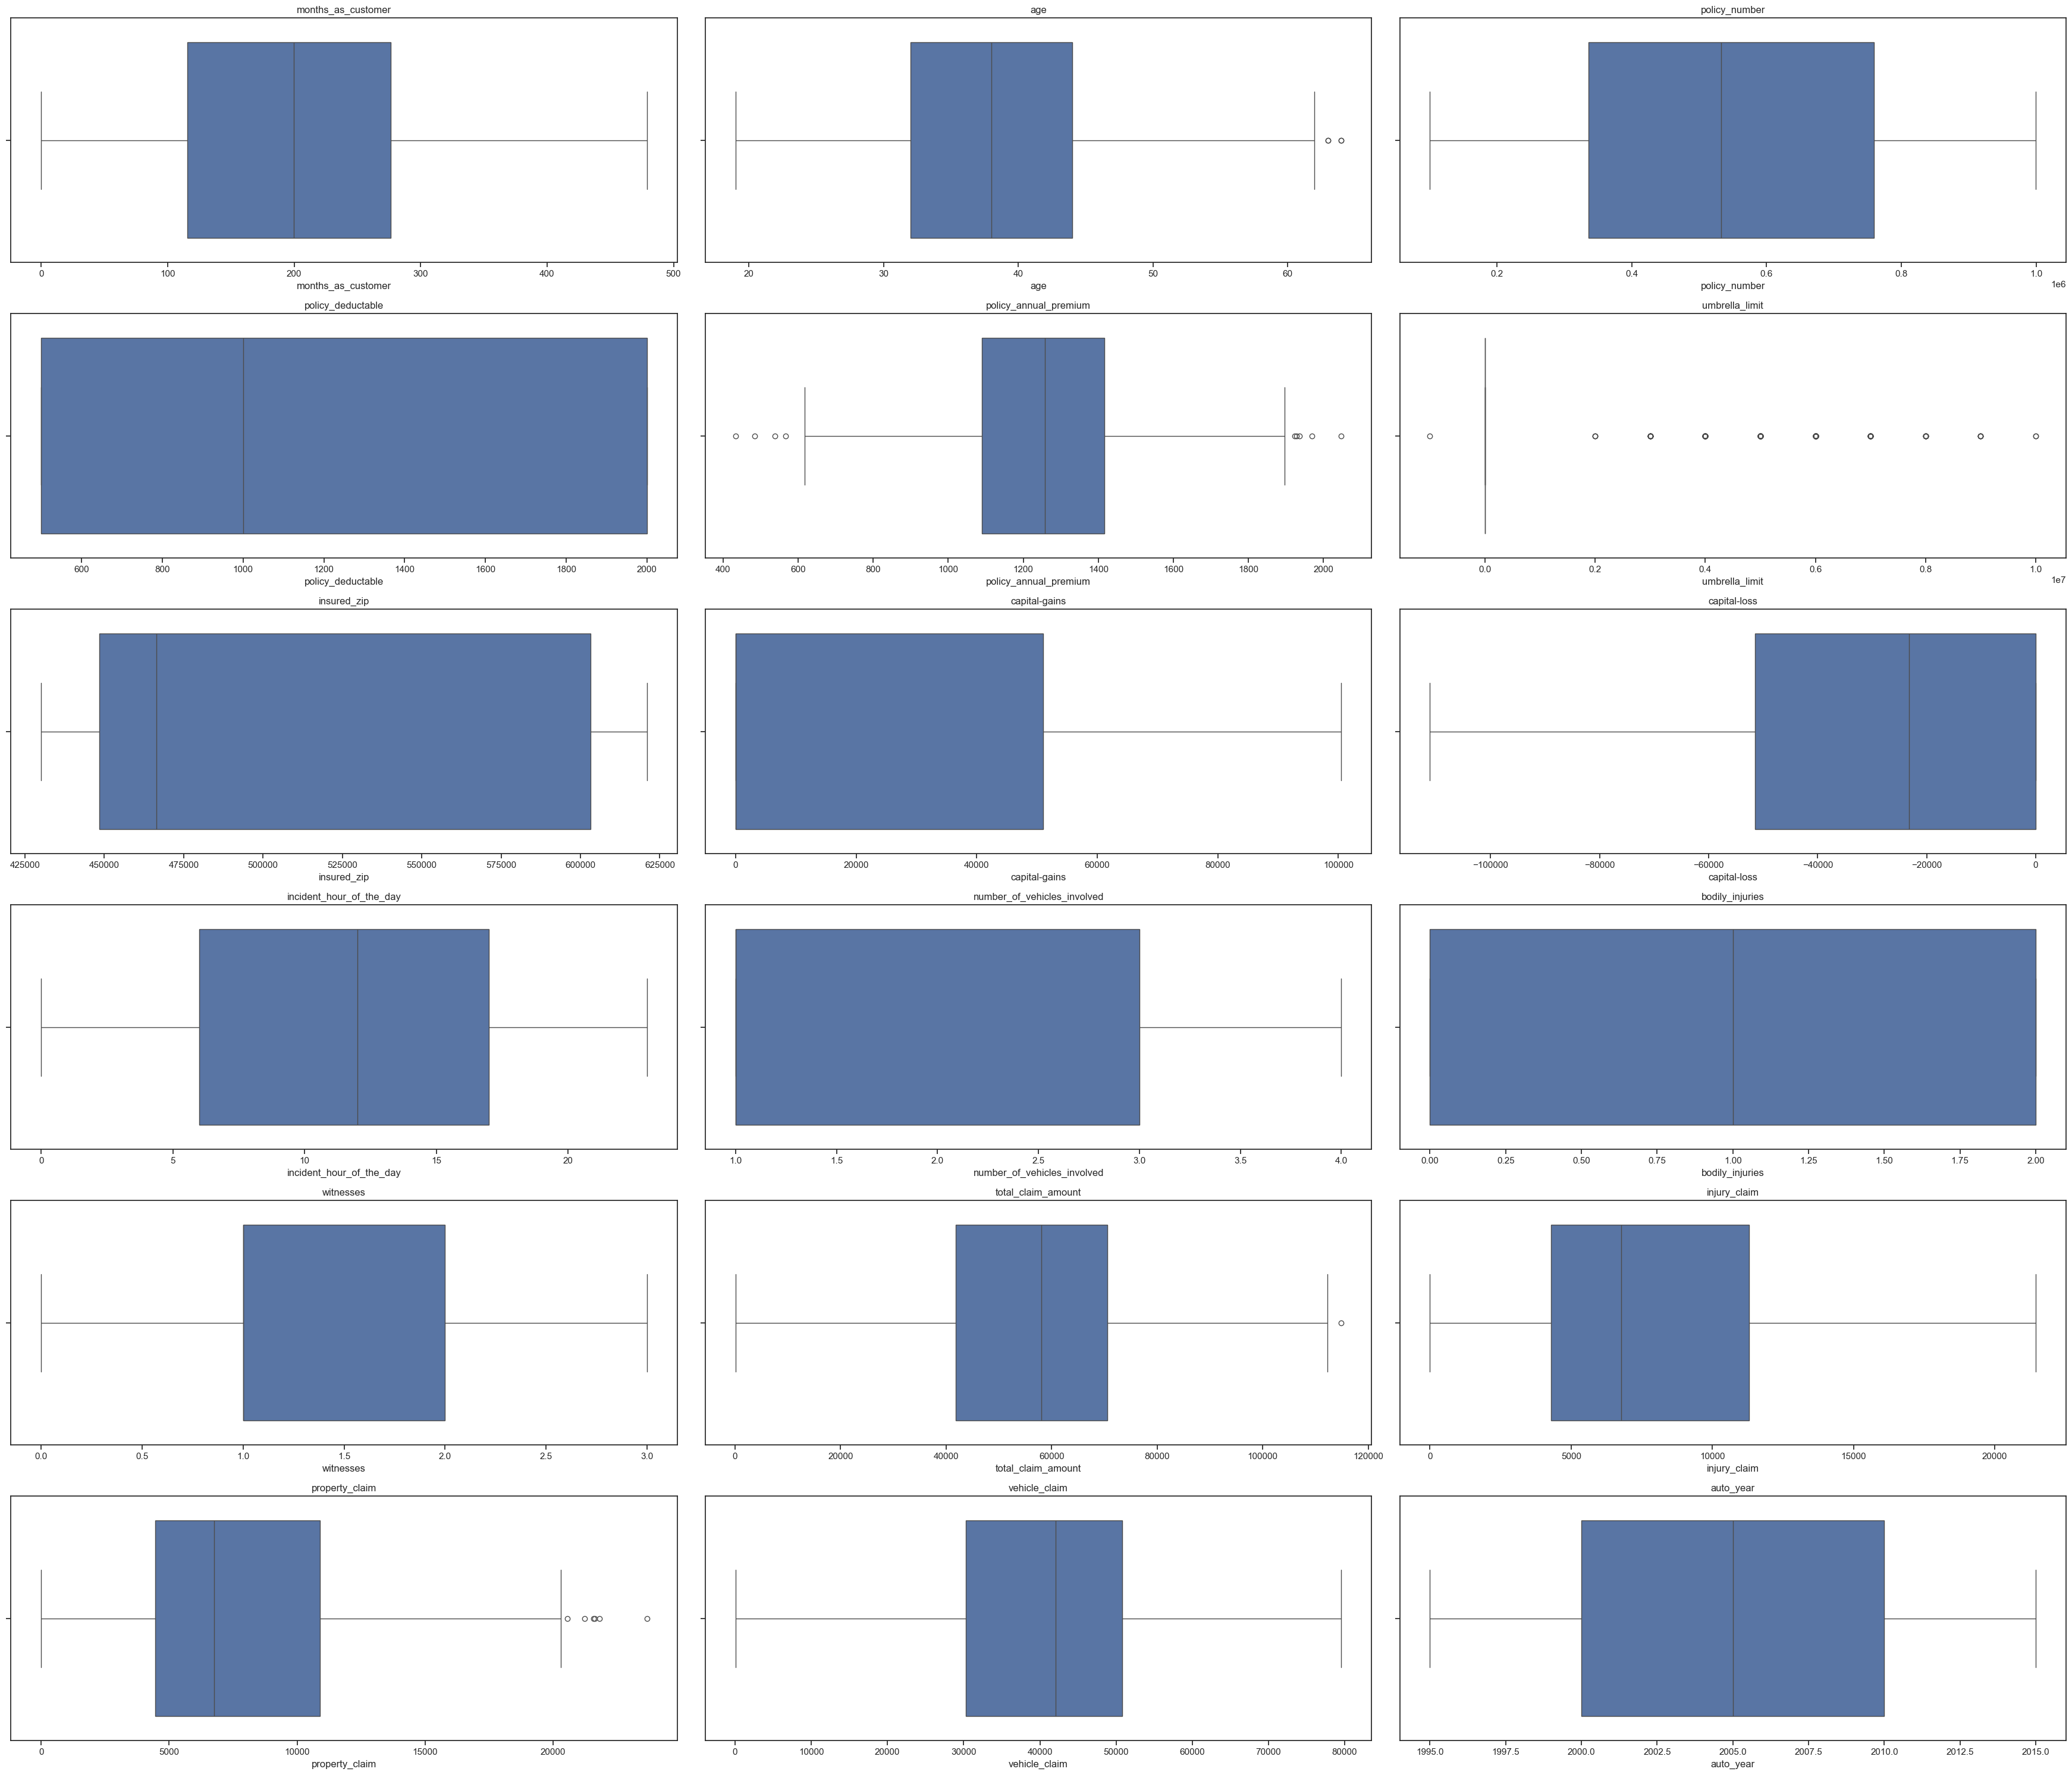

In [62]:
# Check for outliers in numerical columns
numerical_columns = df.select_dtypes(include=['float64', 'int64']).columns

# Boxplot for outlier detection
plt.figure(figsize=(35, 30))
for i, col in enumerate(numerical_columns):
    plt.subplot(6, 3, i + 1)
    sns.boxplot(x=df[col])
    plt.title(col)
plt.tight_layout()
plt.savefig('Boxplot_Outliers.png')
plt.show()

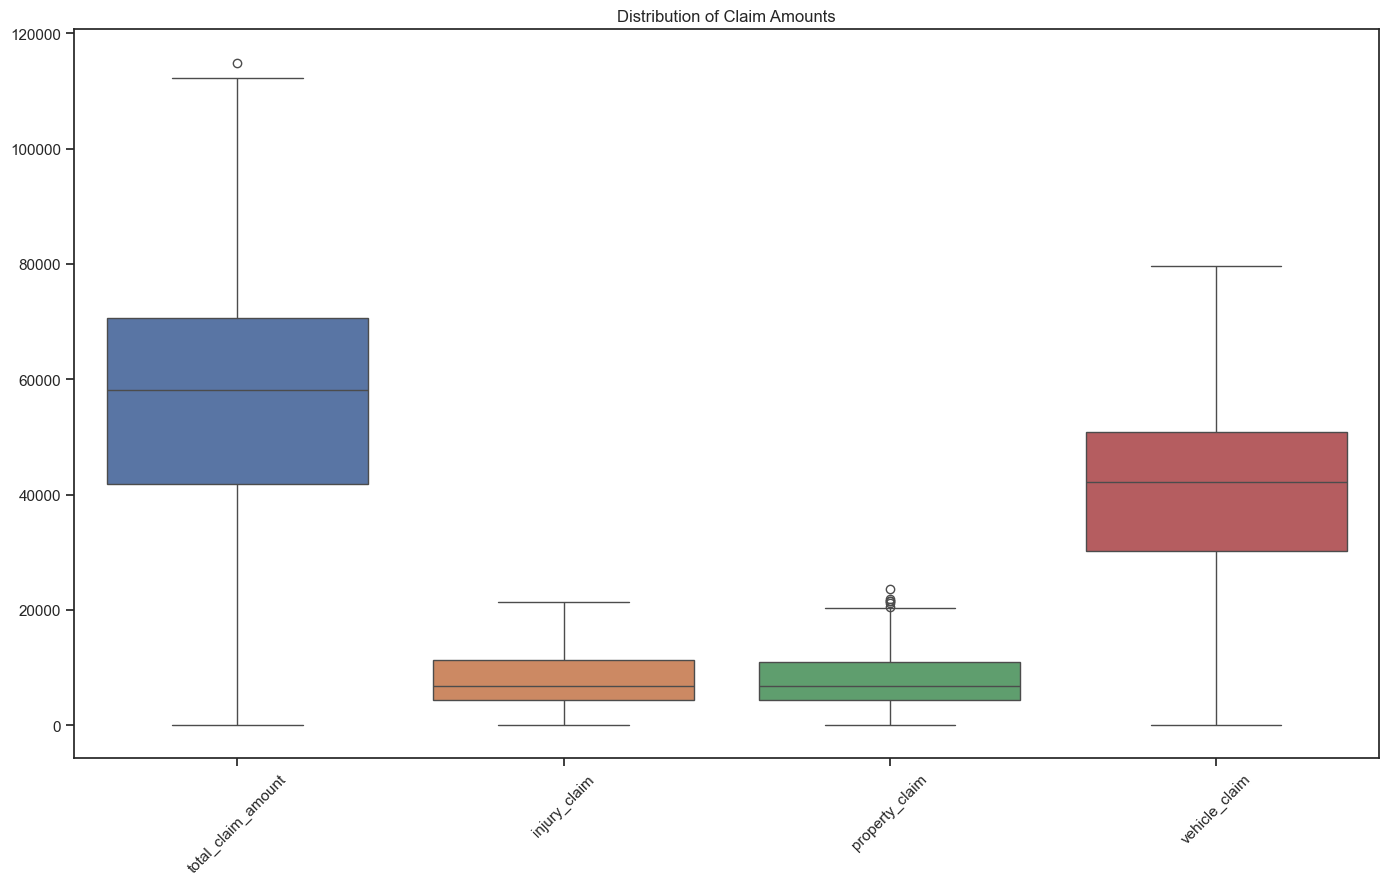

In [63]:
numerical_columns = df.select_dtypes(include=['float64', 'int64']).columns

# Create multiple figures for better visualization
plt.figure(figsize=(15, 9))
sns.boxplot(data=df[['total_claim_amount', 'injury_claim', 'property_claim', 'vehicle_claim']])
plt.xticks(rotation=45)
plt.title('Distribution of Claim Amounts')
plt.savefig('Boxplot_Distribution_of_Claim_Amounts.png')
plt.show()

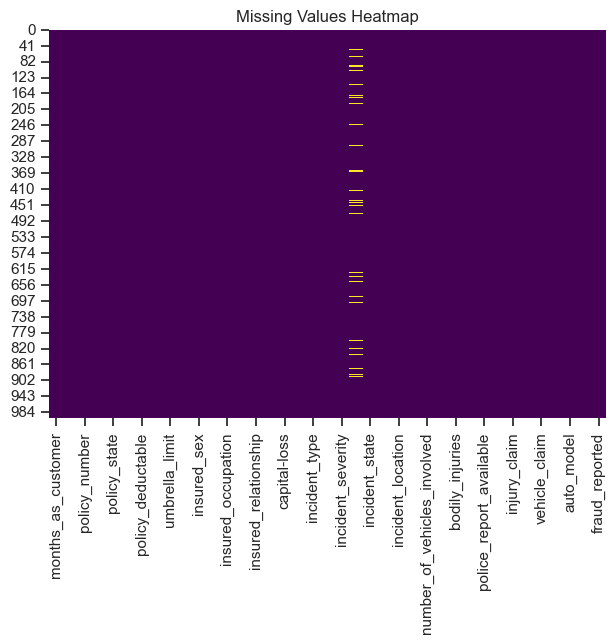

In [64]:
sns.heatmap(df.isnull(), cbar=False, cmap='viridis')
plt.title('Missing Values Heatmap')
plt.savefig('Missing_Values_Heatmap.png')
plt.show()

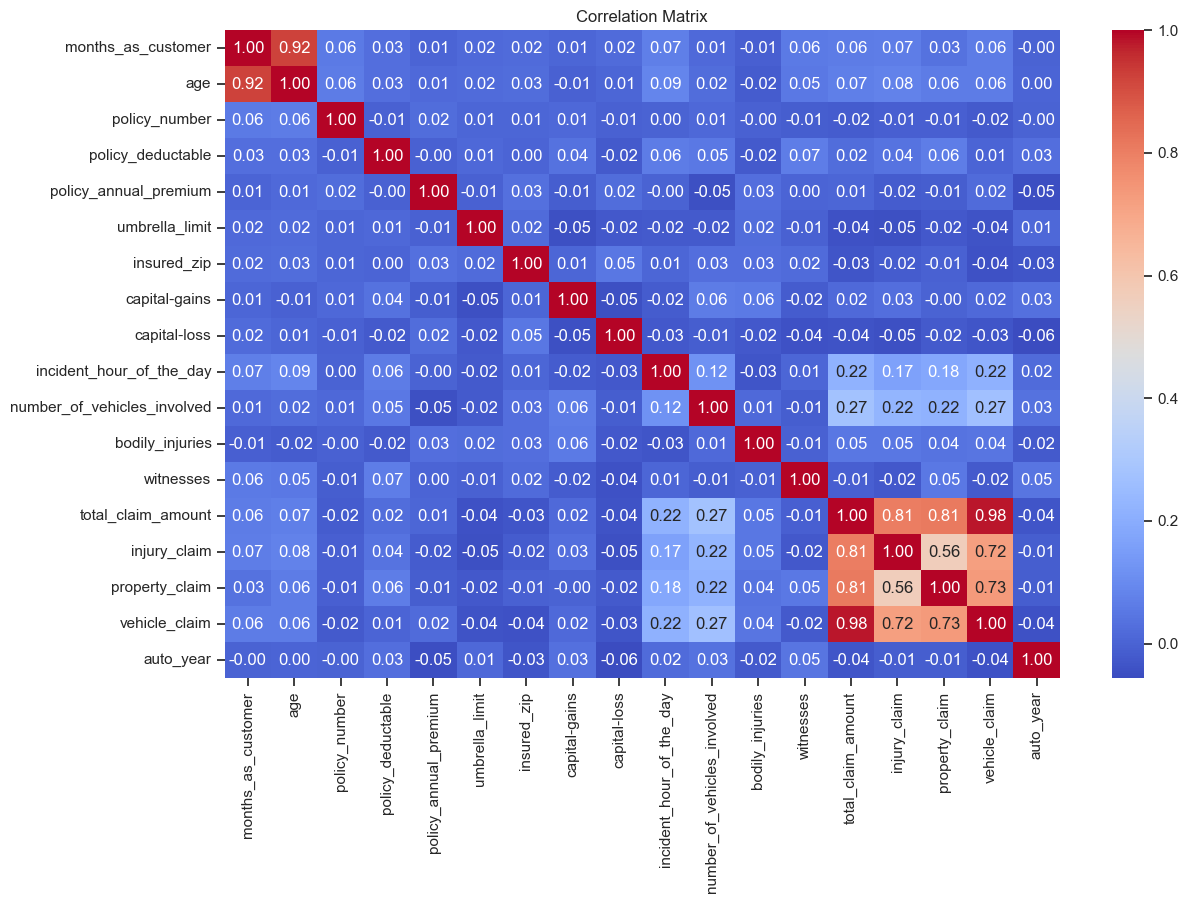

In [87]:
# Plot correlations between numerical features
plt.figure(figsize=(12, 8))
correlation_matrix = df[numerical_columns].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix')
plt.savefig('Correlation_Matrix.png')
plt.show()

In [89]:
# Check the distribution of fraud status
fraud_counts = df['fraud_reported'].value_counts()
print("Fraud Reported Distribution:")
print(fraud_counts)

Fraud Reported Distribution:
fraud_reported
N    753
Y    247
Name: count, dtype: int64


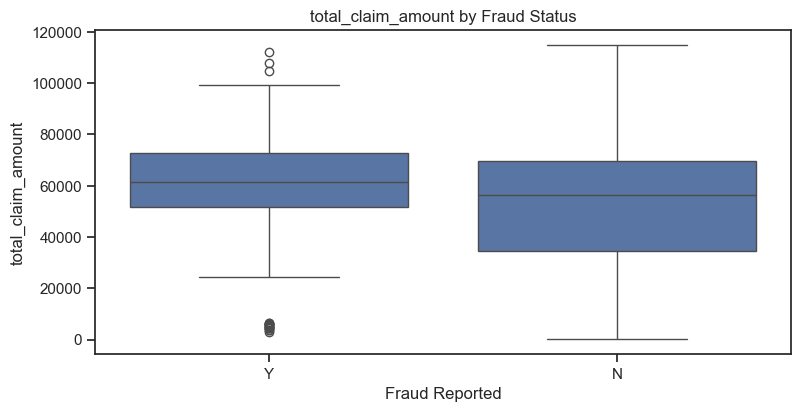

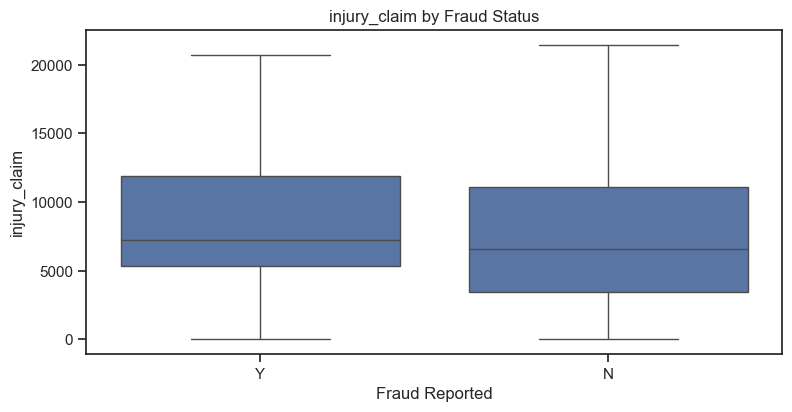

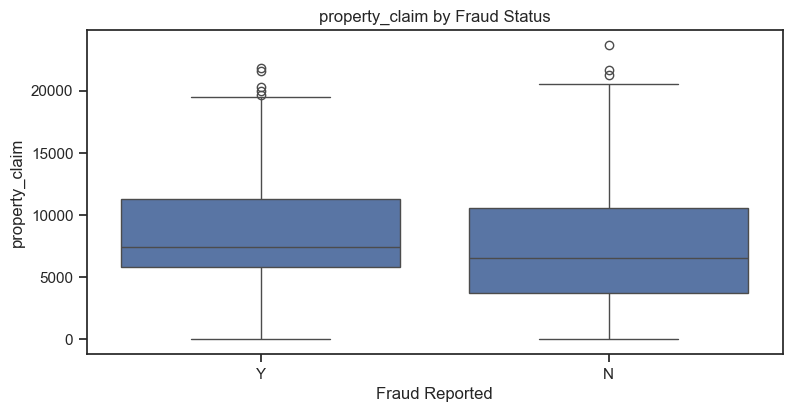

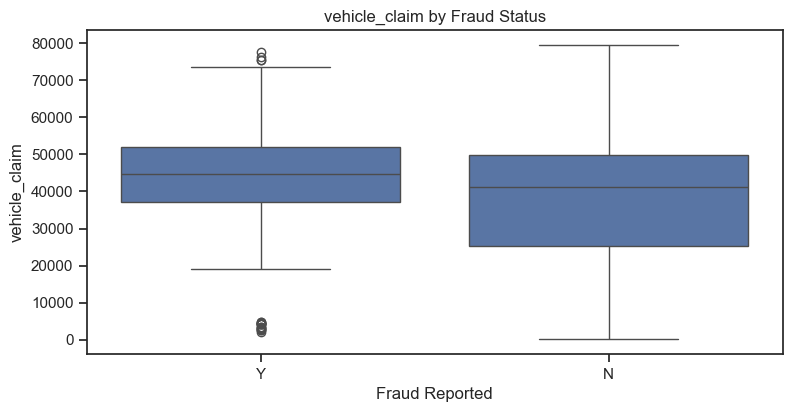

In [90]:
# Compare claim types across fraud status
claim_types = ['total_claim_amount', 'injury_claim', 'property_claim', 'vehicle_claim']
for claim in claim_types:
    plt.figure(figsize=(8, 4))
    sns.boxplot(x='fraud_reported', y=claim, data=df)
    plt.title(f'{claim} by Fraud Status')
    plt.xlabel('Fraud Reported')
    plt.ylabel(claim)
    plt.savefig(f'{claim}_by_Fraud_Status.png')
    plt.show()

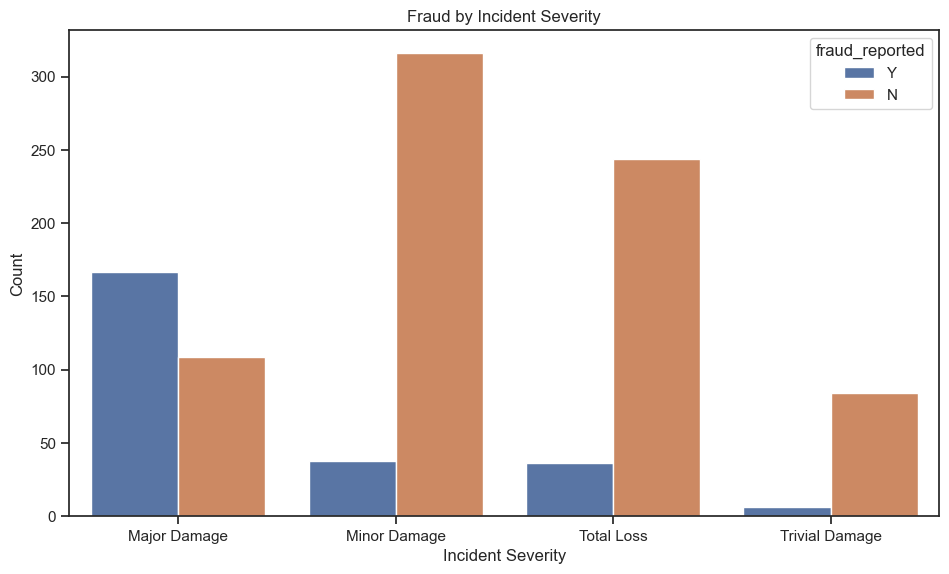

In [91]:
# Analyze the relationship between fraud and incident severity
plt.figure(figsize=(10, 6))
sns.countplot(x='incident_severity', hue='fraud_reported', data=df)
plt.title('Fraud by Incident Severity')
plt.xlabel('Incident Severity')
plt.ylabel('Count')
plt.savefig('Fraud_by_Incident_Severity.png')
plt.show()

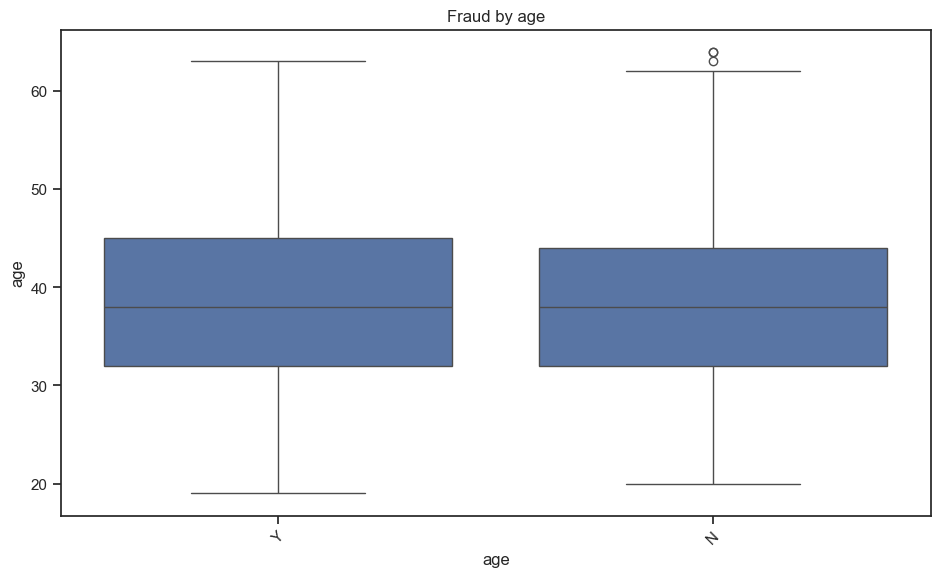

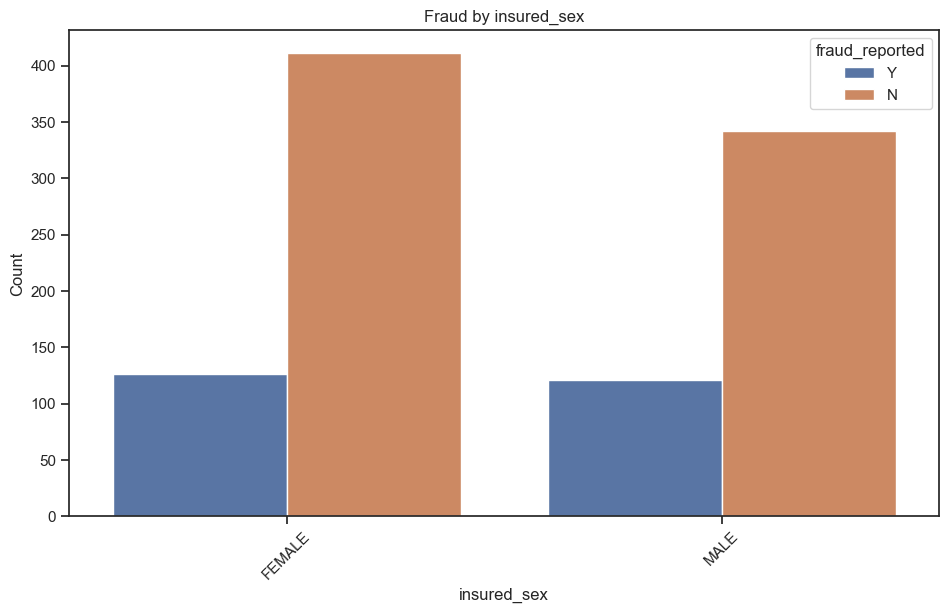

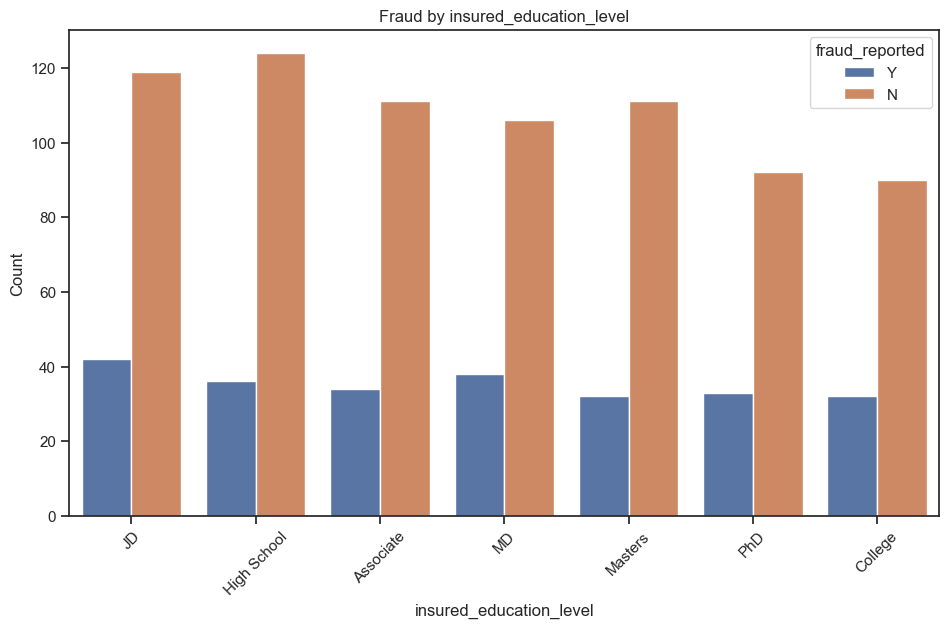

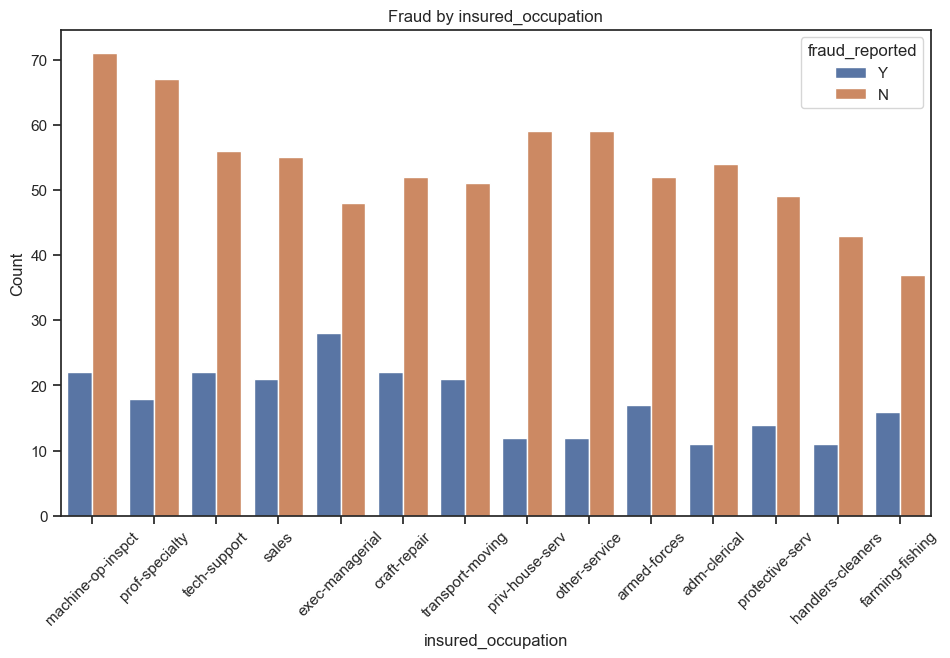

In [92]:
# Analyze fraud patterns by customer demographics
# Demographic variables to analyze
customer_demographics = ['age', 'insured_sex', 'insured_education_level', 'insured_occupation']

# Visualize the relationship between fraud and each demographic variable
for demographic in customer_demographics:
    plt.figure(figsize=(10, 6))
    if df[demographic].dtype == 'object':
        sns.countplot(x=demographic, hue='fraud_reported', data=df, order=df[demographic].value_counts().index)
    else:
        sns.boxplot(x='fraud_reported', y=demographic, data=df)
    plt.title(f'Fraud by {demographic}')
    plt.xlabel(demographic)
    plt.ylabel('Count' if df[demographic].dtype == 'object' else demographic)
    plt.xticks(rotation=45)
    plt.savefig(f'Fraud_by_{demographic}.png')
    plt.show()

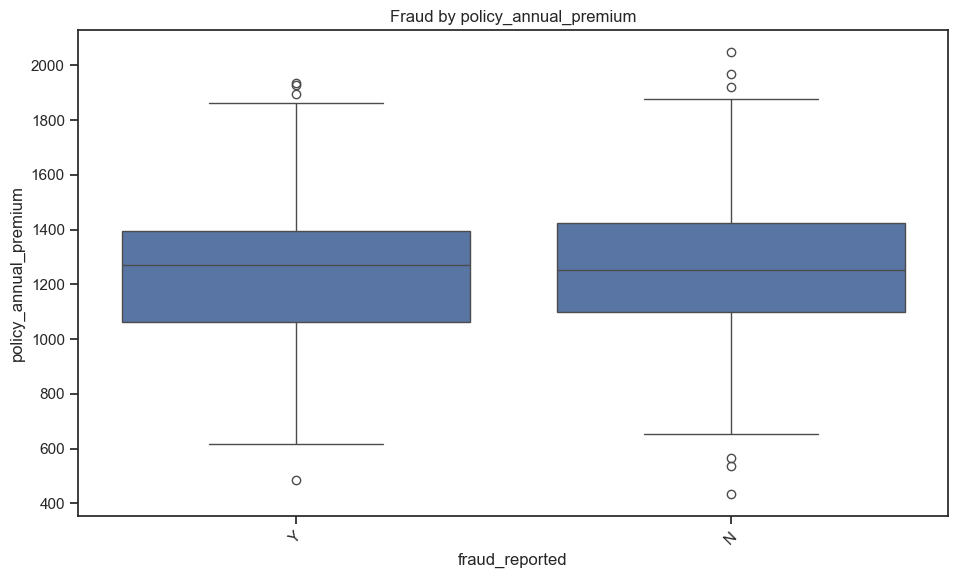

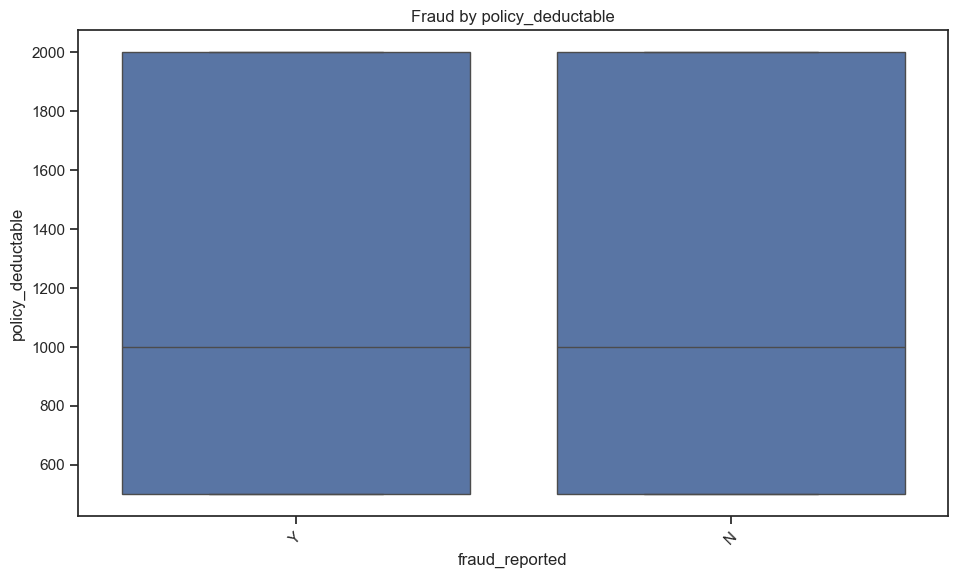

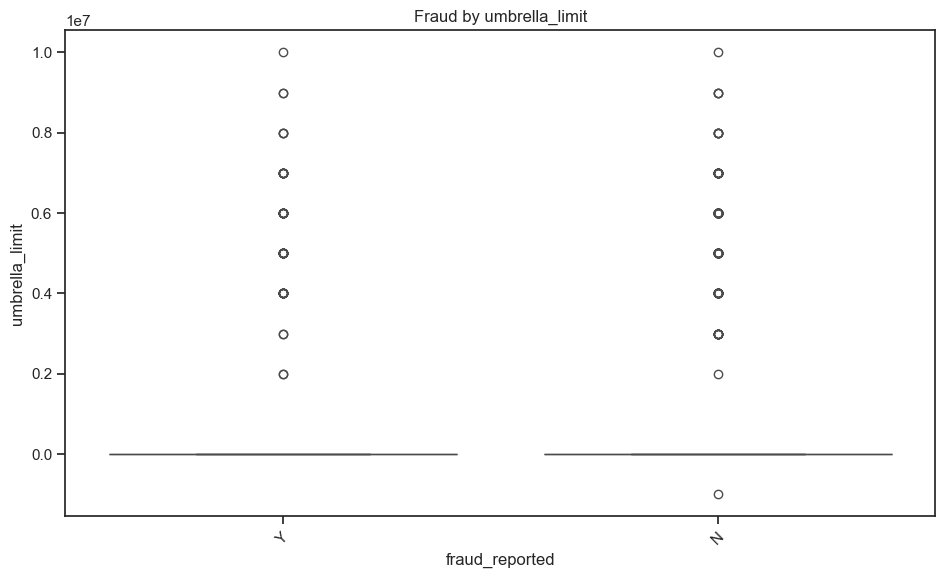

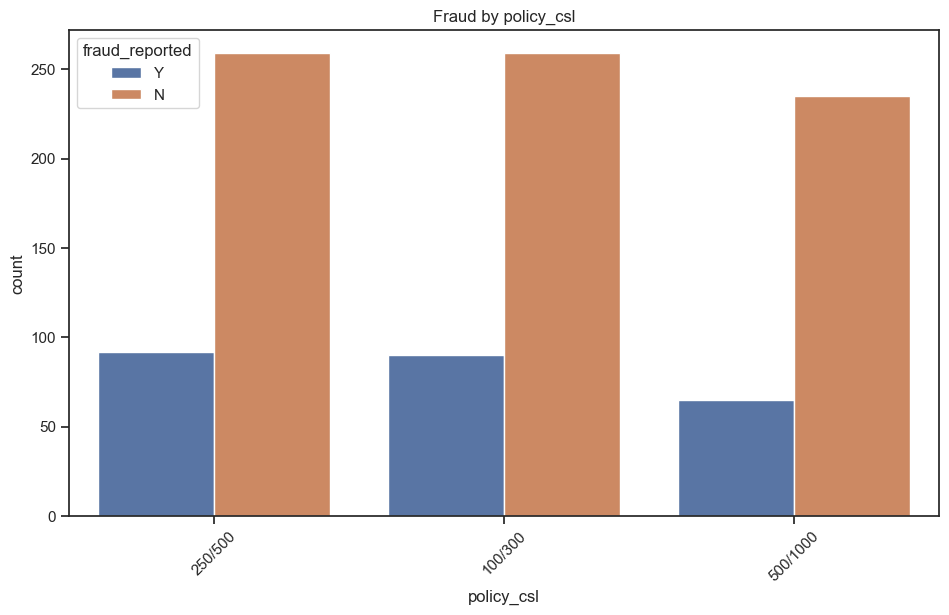

In [93]:
# Analyze policy characteristics associated with fraud
policy_features = ['policy_annual_premium', 'policy_deductable', 'umbrella_limit', 'policy_csl']

# Create visualizations for policy characteristics
for feature in policy_features:
    plt.figure(figsize=(10, 6))
    if df[feature].dtype == 'object':
        sns.countplot(x=feature, hue='fraud_reported', data=df)
    else:
        sns.boxplot(x='fraud_reported', y=feature, data=df)
    plt.title(f'Fraud by {feature}')
    plt.xticks(rotation=45)
    plt.savefig(f'Fraud_by_{feature}.png')
    plt.show()

In [95]:
# Calculate average premium by fraud status
avg_premium = df.groupby('fraud_reported')['policy_annual_premium'].mean()
print("\
Average Premium by Fraud Status:")
print(avg_premium)

Average Premium by Fraud Status:
fraud_reported
N    1258.430000
Y    1250.236275
Name: policy_annual_premium, dtype: float64


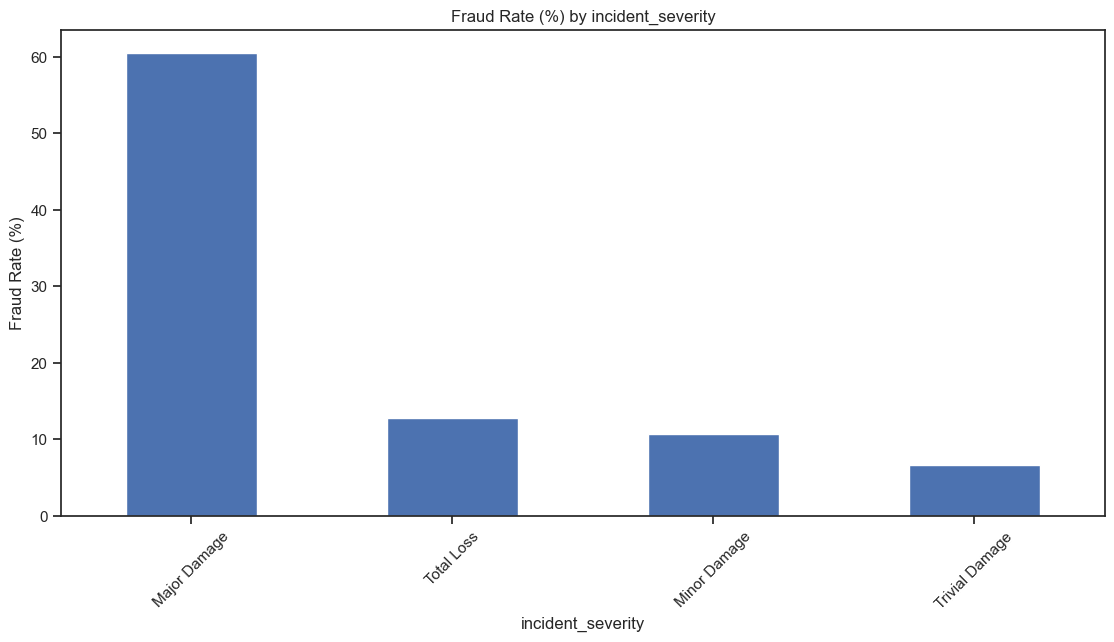

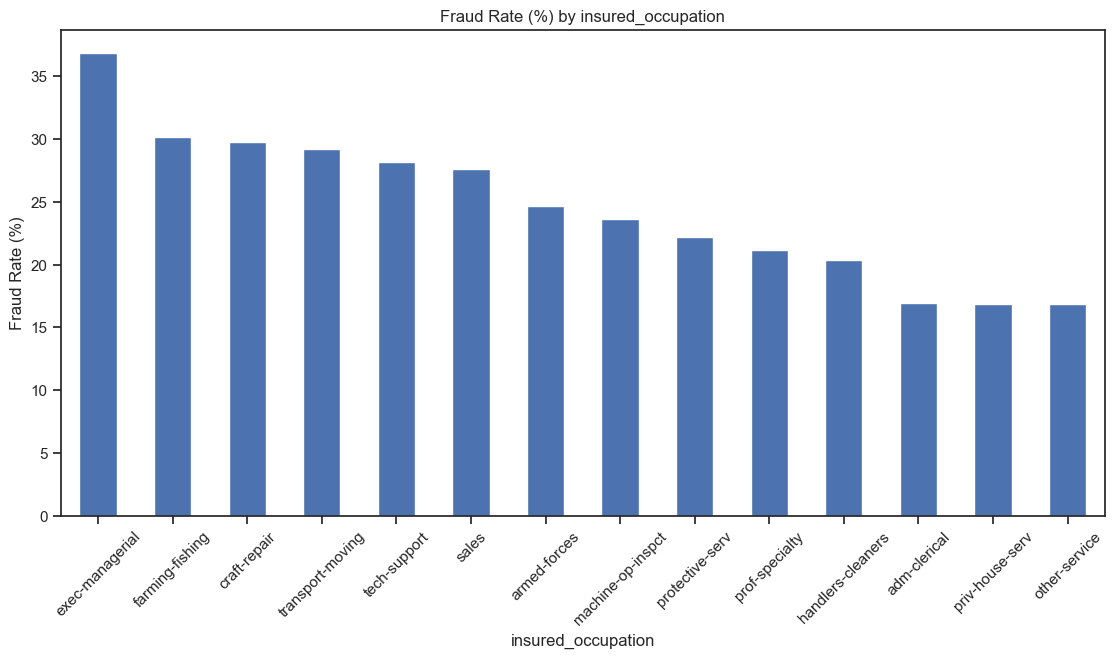

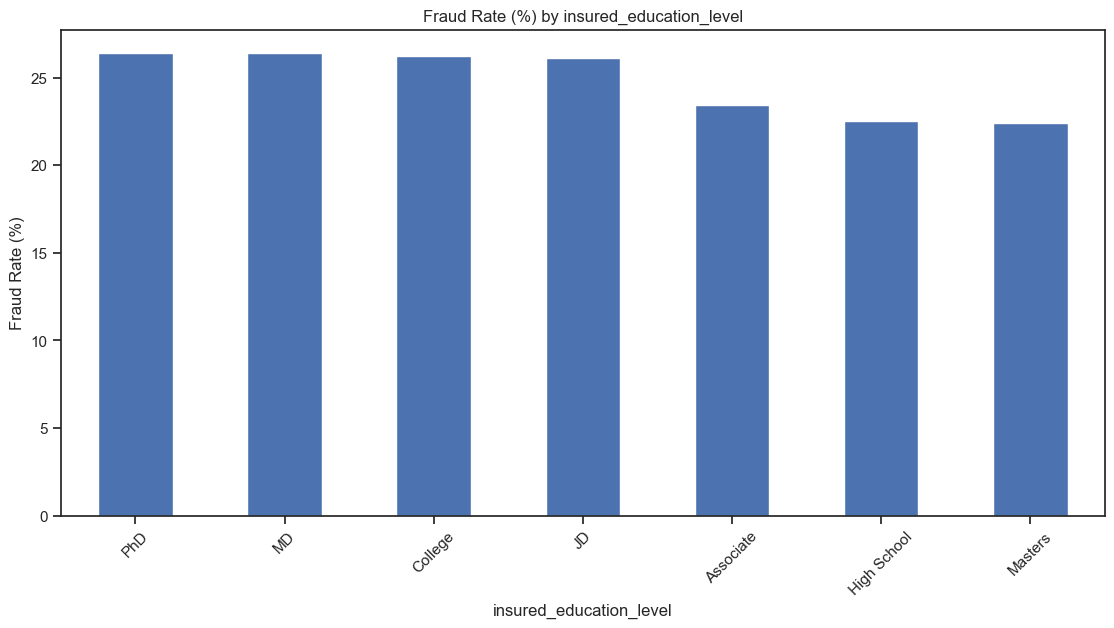

In [96]:
# Calculate fraud rates by key factors
def calc_fraud_rate(df, column):
    return (df.groupby(column)['fraud_reported']
            .apply(lambda x: (x == 'Y').mean() * 100)
            .sort_values(ascending=False))

# Calculate and plot fraud rates
for feature in ['incident_severity', 'insured_occupation', 'insured_education_level']:
    plt.figure(figsize=(12, 6))
    fraud_rates = calc_fraud_rate(df, feature)
    fraud_rates.plot(kind='bar')
    plt.title(f'Fraud Rate (%) by {feature}')
    plt.xticks(rotation=45)
    plt.ylabel('Fraud Rate (%)')
    plt.savefig(f'Fraud_Rate_by_{feature}.png')
    plt.show()

In [98]:
# Analyze claim amounts in fraud cases
print("\
Median Claim Amounts by Fraud Status:")
print(df.groupby('fraud_reported')[['total_claim_amount', 'injury_claim', 
                                    'property_claim', 'vehicle_claim']].median())

Median Claim Amounts by Fraud Status:
                total_claim_amount  injury_claim  property_claim  \
fraud_reported                                                     
N                     56520.0          6620.0         6560.0       
Y                     61290.0          7240.0         7440.0       

                vehicle_claim  
fraud_reported                 
N                  41220.0     
Y                  44800.0     


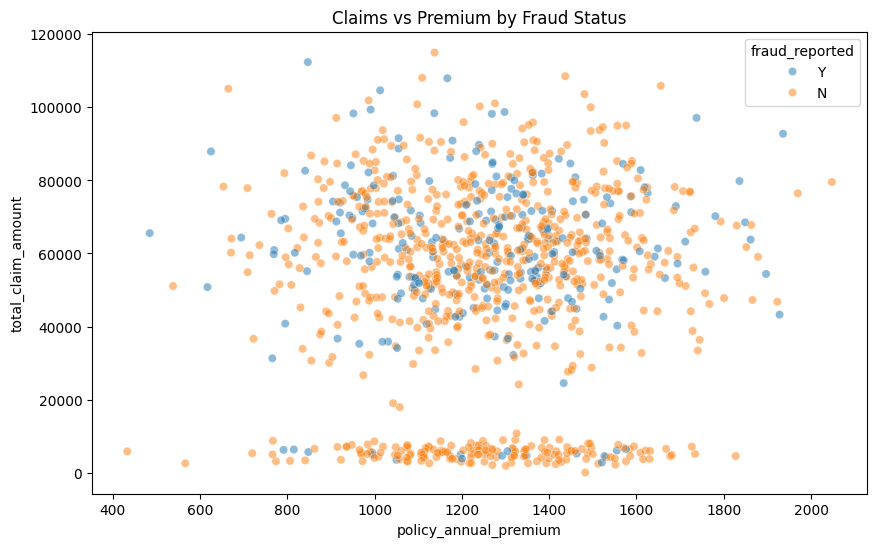

In [207]:
# Calculate loss ratio (total claims / premium)
df['loss_ratio'] = df['total_claim_amount'] / (df['policy_annual_premium'] * 12)

# Analyze pricing factors
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='policy_annual_premium', y='total_claim_amount', 
                hue='fraud_reported', alpha=0.5)
plt.title('Claims vs Premium by Fraud Status')
plt.savefig('Claims_vs_Premium_by_Fraud_Status.png')
plt.show()

In [100]:
# Calculate average loss ratios by key segments
print("\
Median Loss Ratios by Fraud Status:")
print(df.groupby('fraud_reported')['loss_ratio'].median())

Median Loss Ratios by Fraud Status:
fraud_reported
N    3.668495
Y    3.972939
Name: loss_ratio, dtype: float64


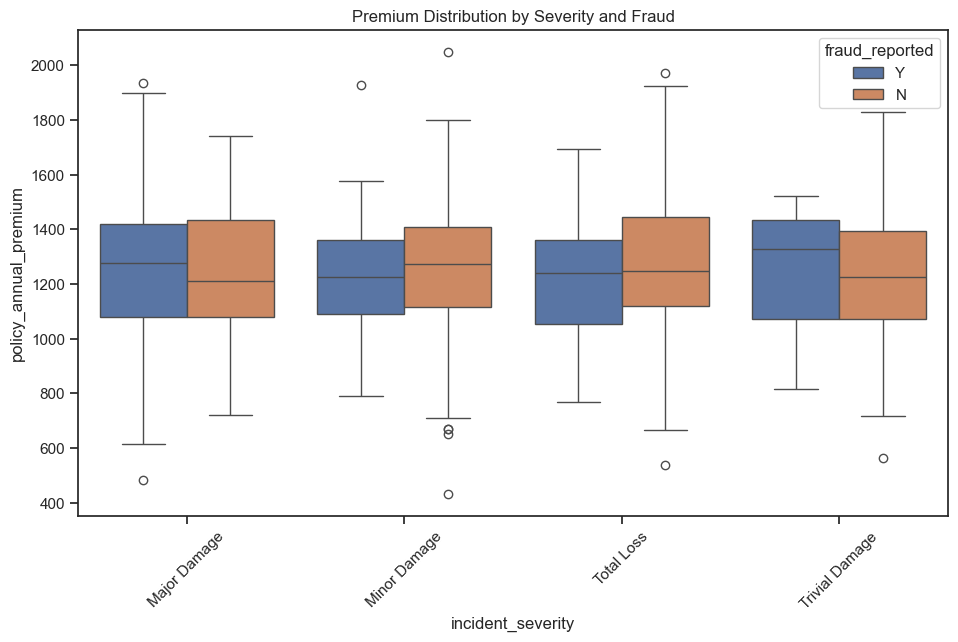

In [101]:
# Premium distribution by risk factors
plt.figure(figsize=(10, 6))
sns.boxplot(x='incident_severity', y='policy_annual_premium', hue='fraud_reported', data=df)
plt.title('Premium Distribution by Severity and Fraud')
plt.xticks(rotation=45)
plt.savefig('Premium_Distribution_by_Severity_and_Fraud.png')
plt.show()


In [102]:
# Calculate profitability metrics
print("\
Premium vs Claims by Incident Severity:")
severity_metrics = df.groupby('incident_severity').agg({
    'policy_annual_premium': 'mean',
    'total_claim_amount': 'mean',
    'fraud_reported': lambda x: (x == 'Y').mean() * 100
}).round(2)
print(severity_metrics)

Premium vs Claims by Incident Severity:
                   policy_annual_premium  total_claim_amount  fraud_reported
incident_severity                                                           
Major Damage              1253.79              64067.17            60.51    
Minor Damage              1260.91              48642.68            10.73    
Total Loss                1261.90              62081.21            12.86    
Trivial Damage            1229.64               5301.67             6.67    


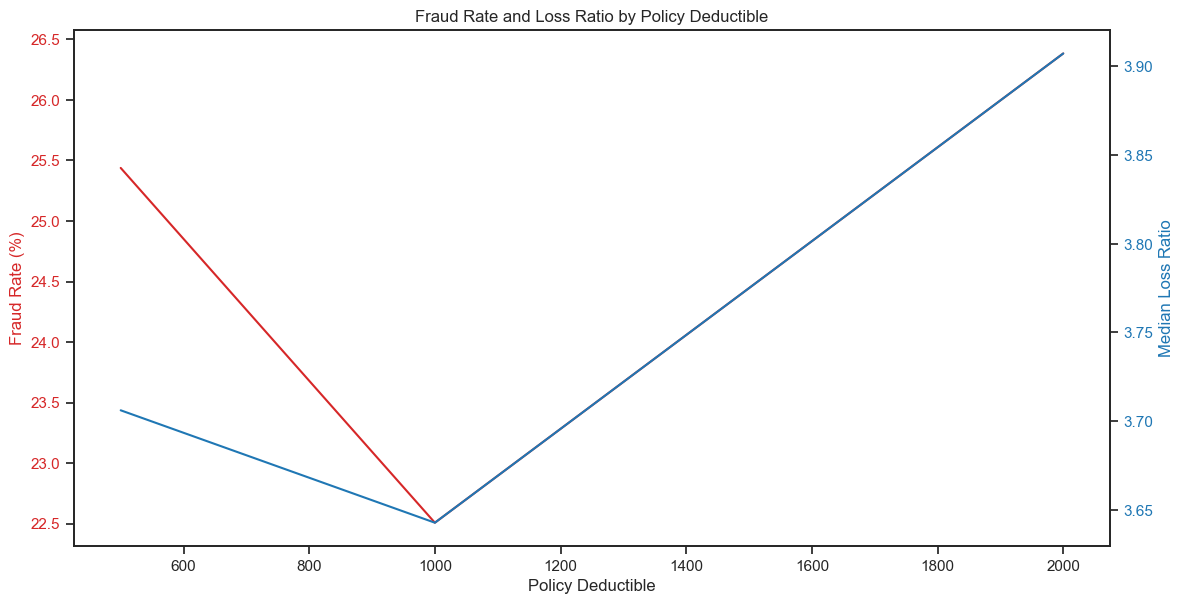

In [103]:
# Analyze fraud rates and loss ratios by policy deductible levels

def calc_fraud_loss_by_deductible(df):
    deductible_analysis = df.groupby('policy_deductable').agg({
        'fraud_reported': lambda x: (x == 'Y').mean() * 100,  # Fraud rate
        'loss_ratio': 'median',  # Median loss ratio
        'total_claim_amount': 'mean',  # Average claim amount
        'policy_annual_premium': 'mean'  # Average premium
    }).reset_index()
    return deductible_analysis

# Perform analysis
deductible_analysis = calc_fraud_loss_by_deductible(df)

# Plot fraud rate and loss ratio by deductible
fig, ax1 = plt.subplots(figsize=(12, 6))

color = 'tab:red'
ax1.set_xlabel('Policy Deductible')
ax1.set_ylabel('Fraud Rate (%)', color=color)
ax1.plot(deductible_analysis['policy_deductable'], deductible_analysis['fraud_reported'], color=color, label='Fraud Rate')
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()
color = 'tab:blue'
ax2.set_ylabel('Median Loss Ratio', color=color)
ax2.plot(deductible_analysis['policy_deductable'], deductible_analysis['loss_ratio'], color=color, label='Loss Ratio')
ax2.tick_params(axis='y', labelcolor=color)

fig.tight_layout()
plt.title('Fraud Rate and Loss Ratio by Policy Deductible')
plt.savefig('Fraud_Rate_and_Loss_Ratio_by_Policy_Deductible.png')
plt.show()

In [104]:
# Display deductible analysis table
print("Deductible Analysis Table:")
print(deductible_analysis)  

Deductible Analysis Table:
   policy_deductable  fraud_reported  loss_ratio  total_claim_amount  \
0         500            25.438596     3.706200      52831.783626      
1        1000            22.507123     3.642943      51609.772080      
2        2000            26.384365     3.906999      54001.433225      

   policy_annual_premium  
0       1251.707661       
1       1264.653162       
2       1252.211303       


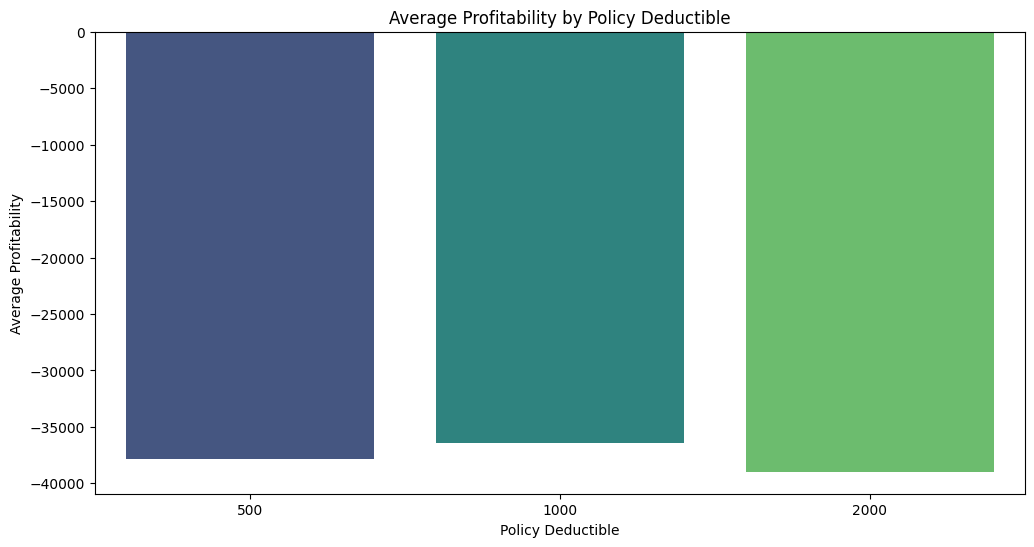

In [208]:
# Calculate profitability metrics (Premium - Claims) by deductible

def calc_profitability(df):
    df['profitability'] = (df['policy_annual_premium'] * 12) - df['total_claim_amount']
    profitability_analysis = df.groupby('policy_deductable').agg({
        'profitability': 'mean',  # Average profitability
        'fraud_reported': lambda x: (x == 'Y').mean() * 100,  # Fraud rate
        'loss_ratio': 'median',  # Median loss ratio
        'total_claim_amount': 'mean',  # Average claim amount
        'policy_annual_premium': 'mean'  # Average premium
    }).reset_index()
    return profitability_analysis

# Perform profitability analysis
profitability_analysis = calc_profitability(df)   

# Plot profitability by deductible
plt.figure(figsize=(12, 6))
sns.barplot(x='policy_deductable', y='profitability', data=profitability_analysis, palette='viridis')
plt.title('Average Profitability by Policy Deductible')
plt.xlabel('Policy Deductible')
plt.ylabel('Average Profitability')
plt.savefig('Average_Profitability_by_Policy_Deductible.png')
plt.show()

In [106]:
# Display profitability analysis table
print("Profitability Analysis Table:")
print(profitability_analysis)

Profitability Analysis Table:
   policy_deductable  profitability  fraud_reported  loss_ratio  \
0         500        -37811.291696      25.438596     3.706200    
1        1000        -36433.934131      22.507123     3.642943    
2        2000        -38974.897590      26.384365     3.906999    

   total_claim_amount  policy_annual_premium  
0     52831.783626          1251.707661       
1     51609.772080          1264.653162       
2     54001.433225          1252.211303       


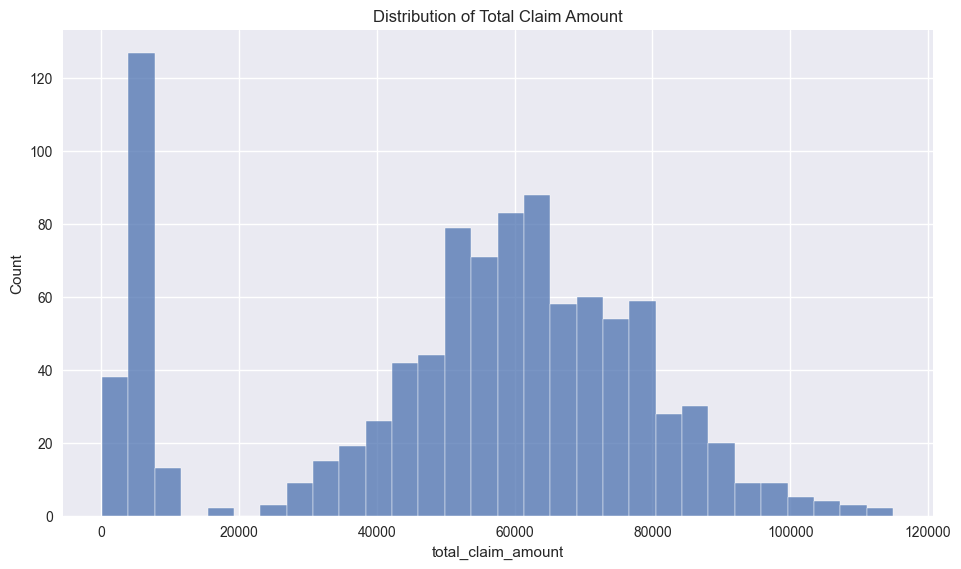

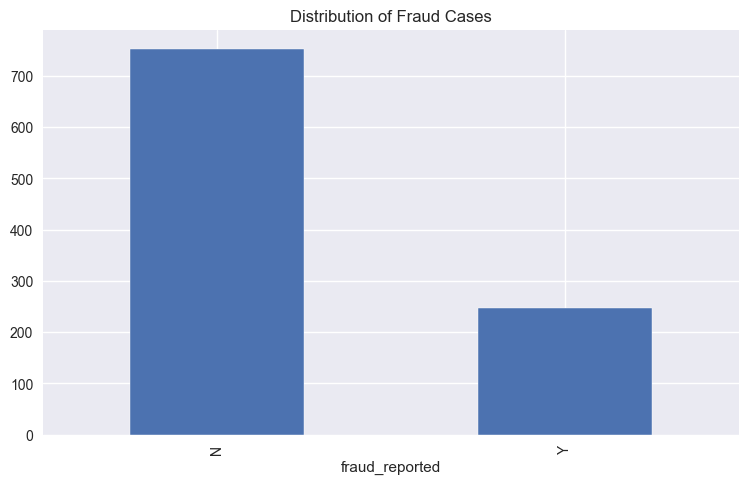

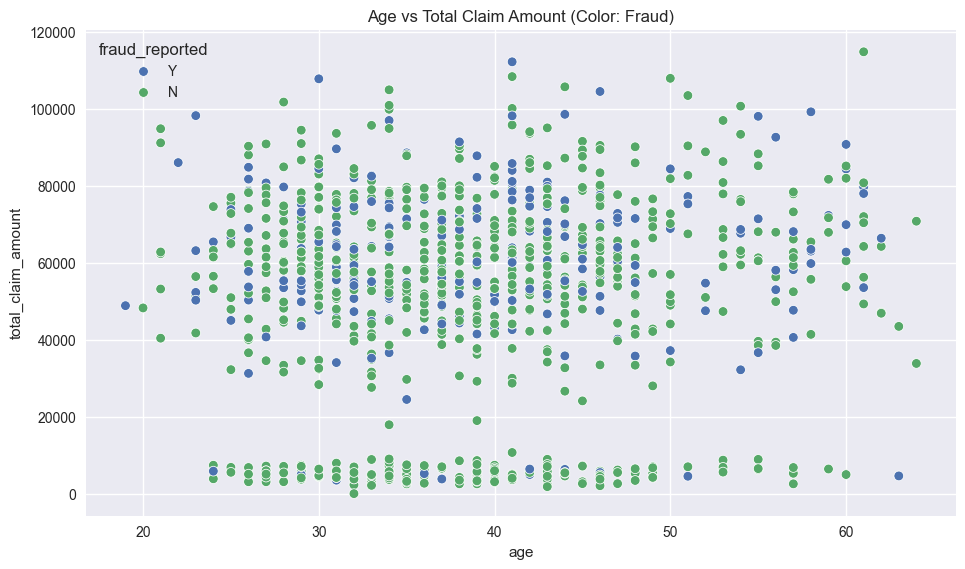

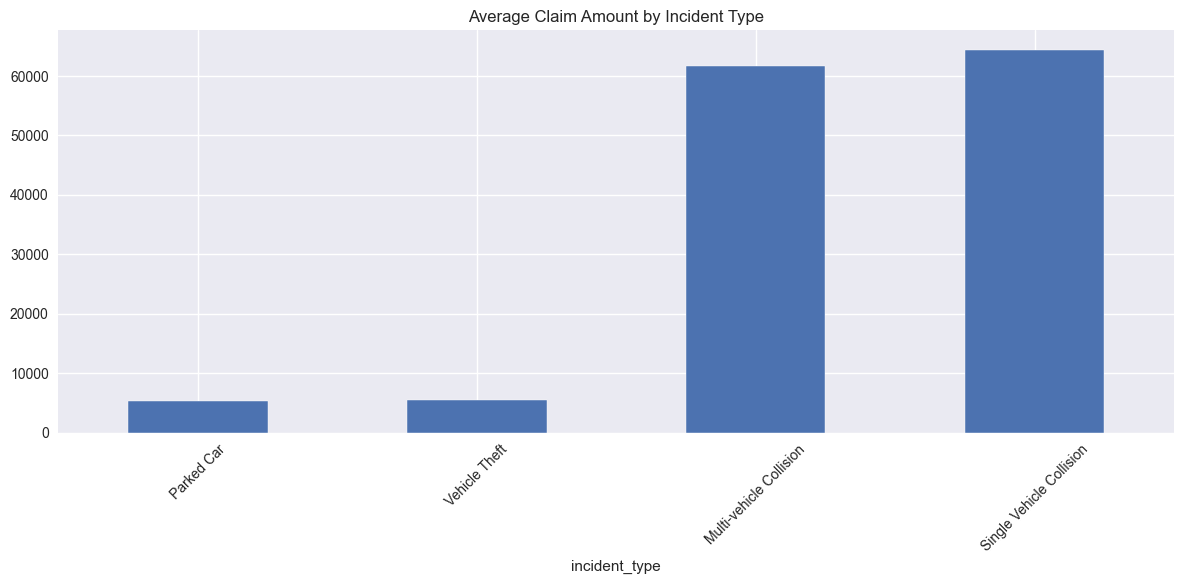

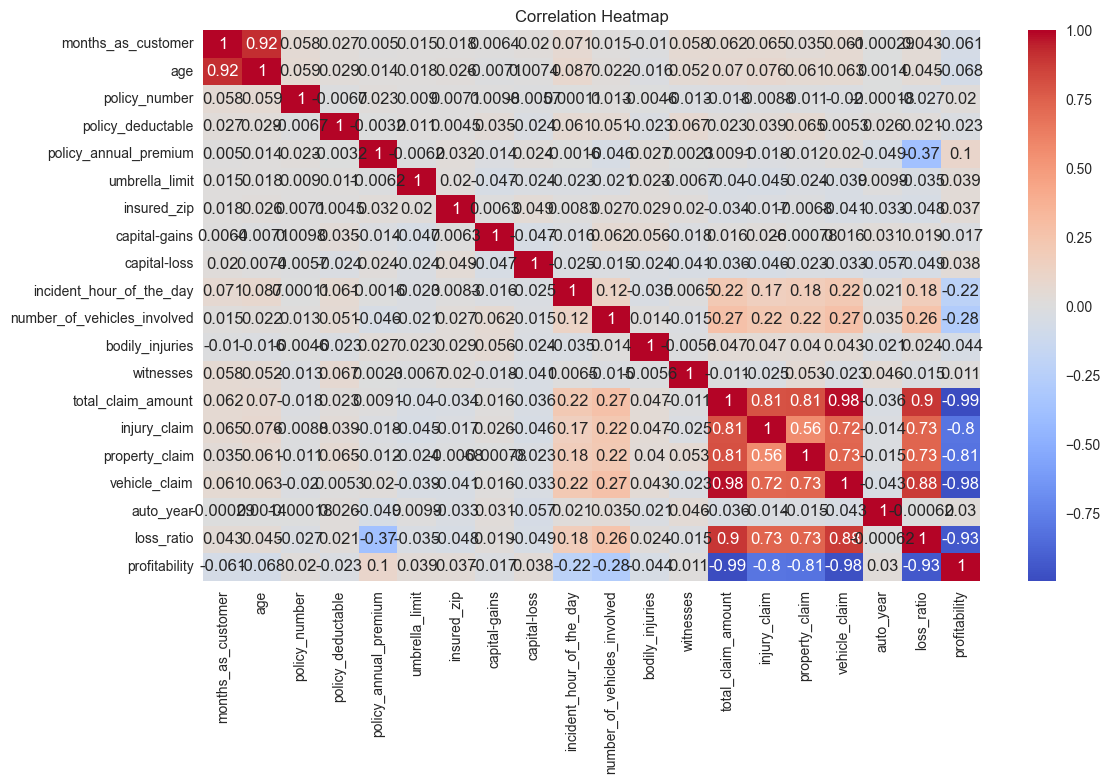

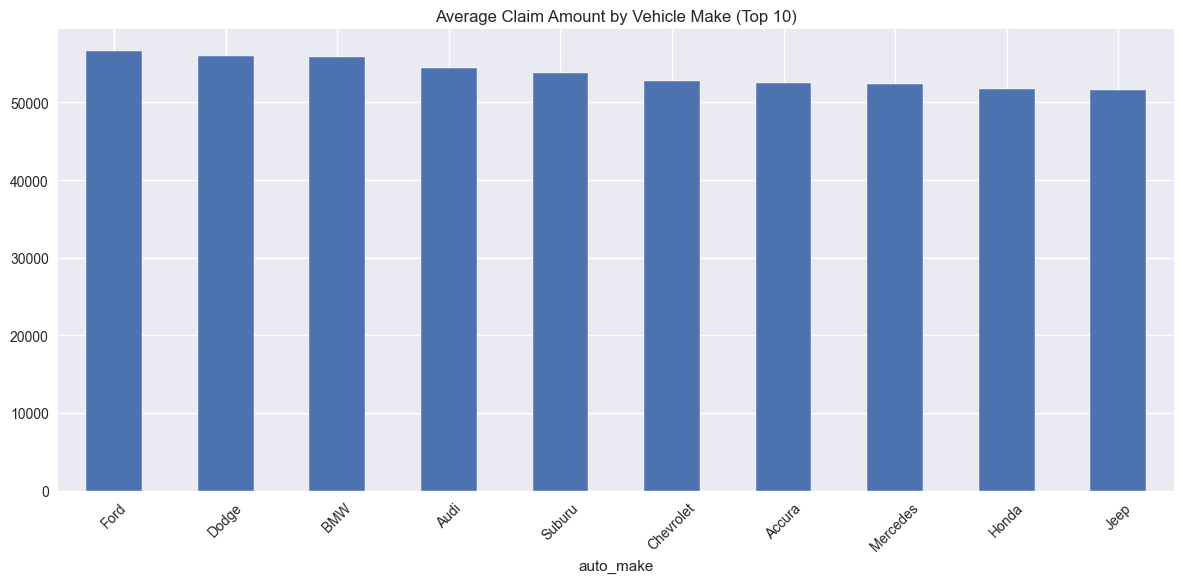

In [107]:
# Set style
plt.style.use('seaborn-v0_8')

# 1. Distribution of Total Claim Amount
plt.figure(figsize=(10, 6))
sns.histplot(df['total_claim_amount'], bins=30)
plt.title('Distribution of Total Claim Amount')
plt.savefig('Distribution_of_Total_Claim_Amount.png')
plt.show()

# 2. Fraud Distribution
plt.figure(figsize=(8, 5))
df['fraud_reported'].value_counts().plot(kind='bar')
plt.title('Distribution of Fraud Cases')
plt.savefig('Distribution_of_Fraud_Cases.png')
plt.show()

# 3. Age vs Total Claim Amount with Fraud
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='age', y='total_claim_amount', hue='fraud_reported')
plt.title('Age vs Total Claim Amount (Color: Fraud)')
plt.savefig('Age_vs_Total_Claim_Amount_with_Fraud.png')
plt.show()

# 4. Average Claim Amount by Incident Type
plt.figure(figsize=(12, 6))
df.groupby('incident_type')['total_claim_amount'].mean().sort_values().plot(kind='bar')
plt.xticks(rotation=45)
plt.title('Average Claim Amount by Incident Type')
plt.tight_layout()
plt.savefig('Average_Claim_Amount_by_Incident_Type.png')
plt.show()

# 5. Correlation Heatmap of Numerical Variables
numerical_cols = df.select_dtypes(include=['float64', 'int64']).columns
plt.figure(figsize=(12, 8))
sns.heatmap(df[numerical_cols].corr(), annot=True, cmap='coolwarm', center=0)
plt.title('Correlation Heatmap')
plt.tight_layout()
plt.savefig('Correlation_Heatmap.png')
plt.show()

# 6. Claims by Vehicle Make
plt.figure(figsize=(12, 6))
df.groupby('auto_make')['total_claim_amount'].mean().sort_values(ascending=False).head(10).plot(kind='bar')
plt.title('Average Claim Amount by Vehicle Make (Top 10)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig('Average_Claim_Amount_by_Vehicle_Make.png')
plt.show()

In [108]:
print("Key Statistics:")
print("\
Fraud Rate:", (df['fraud_reported'] == 'Y').mean() * 100, "%")
print("\
Most Common Incident Type:", df['incident_type'].mode()[0])
print("\
Average Total Claim Amount: $", round(df['total_claim_amount'].mean(), 2))

Key Statistics:
Fraud Rate: 24.7 %
Most Common Incident Type: Multi-vehicle Collision
Average Total Claim Amount: $ 52761.94


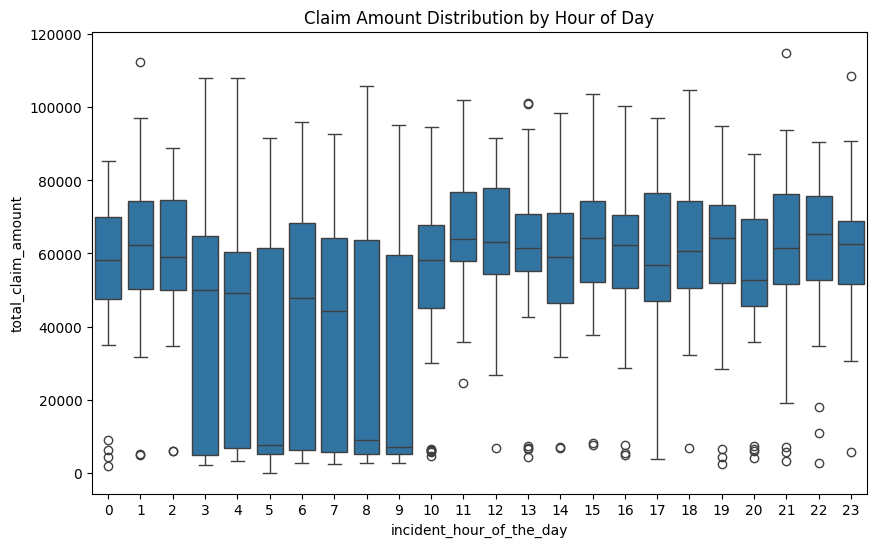

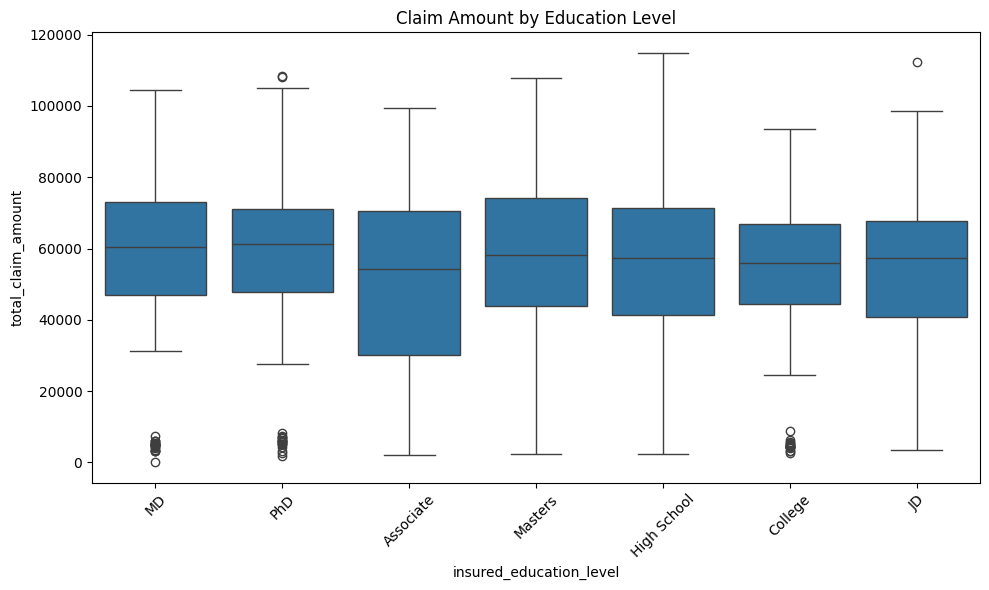

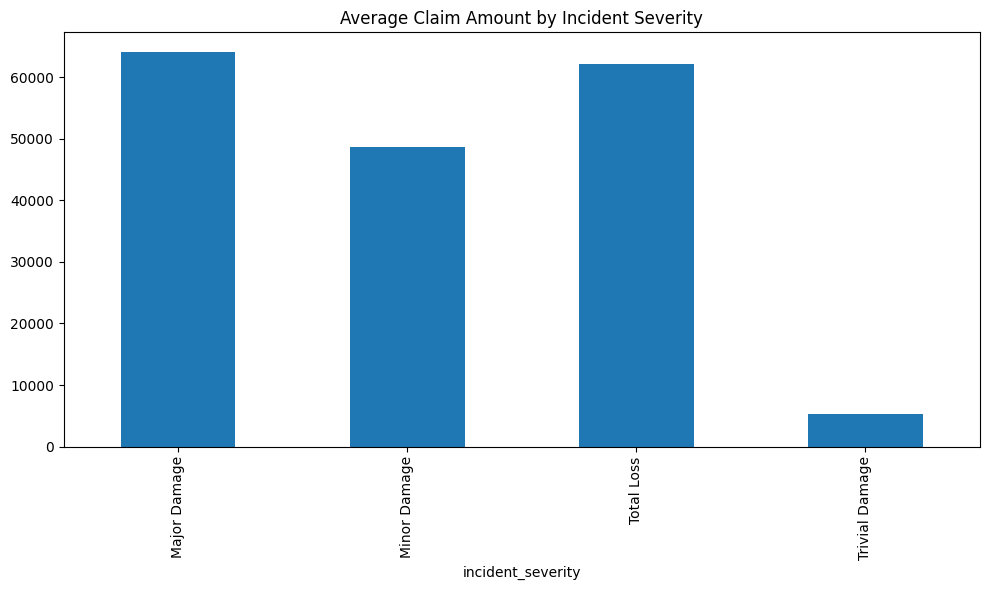

In [209]:
# Time-based analysis
df['policy_bind_date'] = pd.to_datetime(df['policy_bind_date'])
df['incident_date'] = pd.to_datetime(df['incident_date'])

# Claims by hour
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='incident_hour_of_the_day', y='total_claim_amount')
plt.title('Claim Amount Distribution by Hour of Day')
plt.savefig('Claim_Amount_Distribution_by_Hour_of_Day.png')
plt.show()

# Education level vs Claims
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='insured_education_level', y='total_claim_amount')
plt.xticks(rotation=45)
plt.title('Claim Amount by Education Level')
plt.tight_layout()
plt.savefig('Claim_Amount_by_Education_Level.png')
plt.show()

# Incident severity analysis
plt.figure(figsize=(10, 6))
df.groupby('incident_severity')['total_claim_amount'].mean().plot(kind='bar')
plt.title('Average Claim Amount by Incident Severity')
plt.tight_layout()
plt.savefig('Average_Claim_Amount_by_Incident_Severity.png')
plt.show()

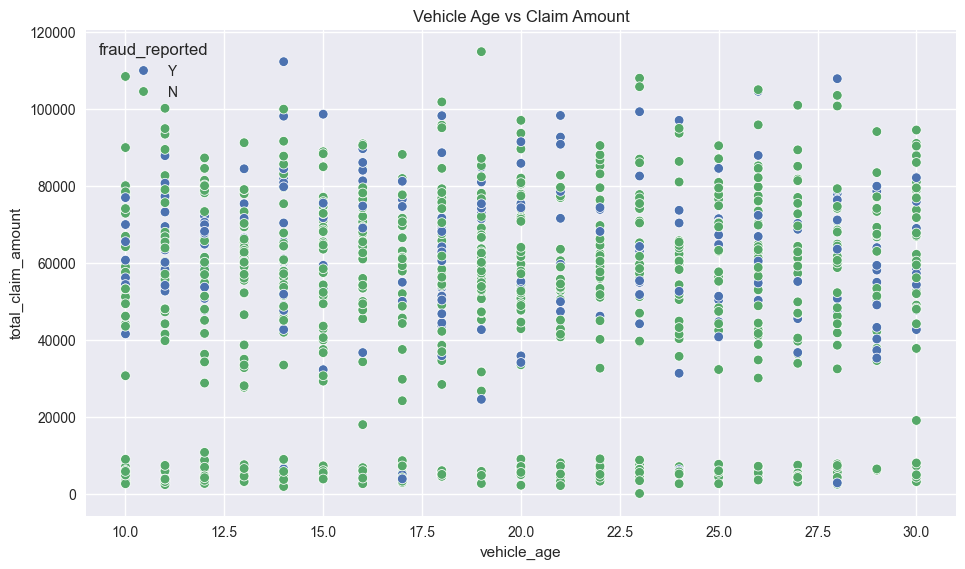

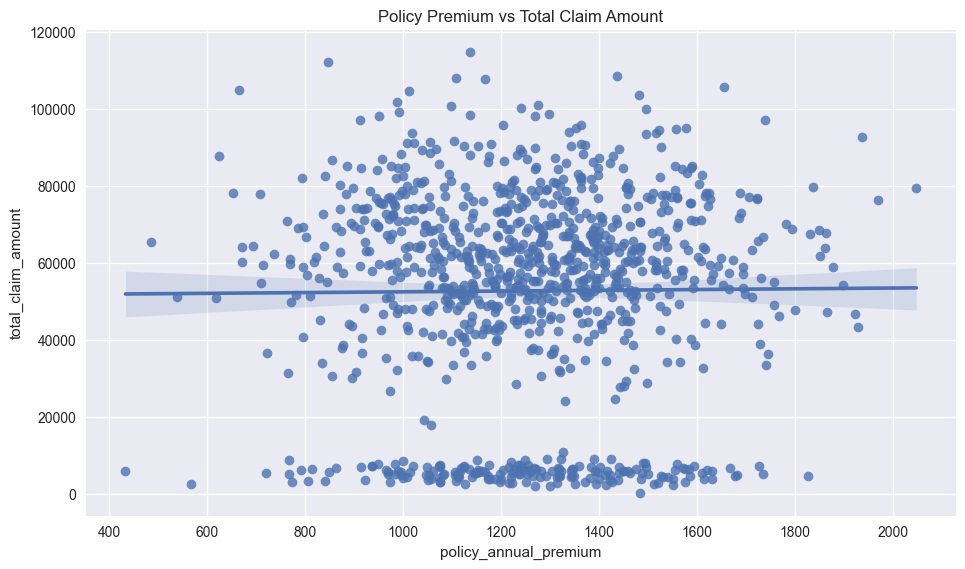

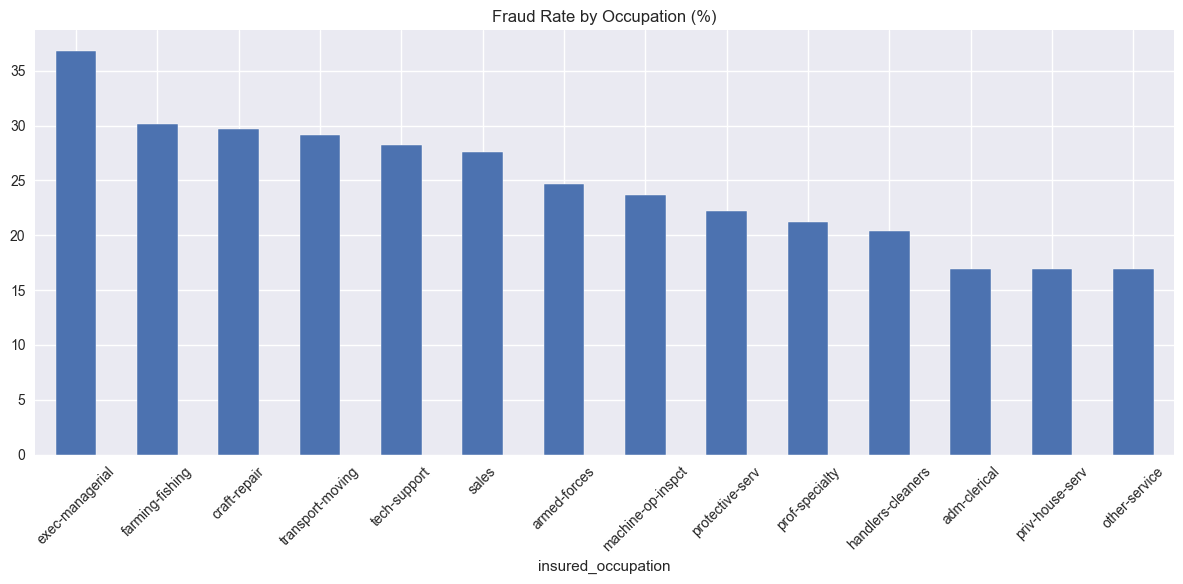

In [111]:
# 1. Vehicle Age Analysis
df['vehicle_age'] = 2025 - df['auto_year']  # Using current year

# Vehicle age vs claims
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='vehicle_age', y='total_claim_amount', hue='fraud_reported')
plt.title('Vehicle Age vs Claim Amount')
plt.savefig('Vehicle_Age_vs_Claim_Amount.png')
plt.show()

# 2. Policy Premium vs Claims
plt.figure(figsize=(10, 6))
sns.regplot(data=df, x='policy_annual_premium', y='total_claim_amount')
plt.title('Policy Premium vs Total Claim Amount')
plt.savefig('Policy_Premium_vs_Total_Claim_Amount.png')
plt.show()

# 3. Fraud patterns by occupation
plt.figure(figsize=(12, 6))
fraud_by_occupation = df.groupby('insured_occupation')['fraud_reported'].apply(lambda x: (x == 'Y').mean() * 100)
fraud_by_occupation.sort_values(ascending=False).plot(kind='bar')
plt.title('Fraud Rate by Occupation (%)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig('Fraud_Rate_by_Occupation.png')
plt.show()

In [112]:
print("Average vehicle age:", round(df['vehicle_age'].mean(), 2), "years")
print("Correlation between premium and claims:", round(df['policy_annual_premium'].corr(df['total_claim_amount']), 3))
print("Most risky occupation (fraud-wise):", fraud_by_occupation.idxmax())

Average vehicle age: 19.9 years
Correlation between premium and claims: 0.009
Most risky occupation (fraud-wise): exec-managerial


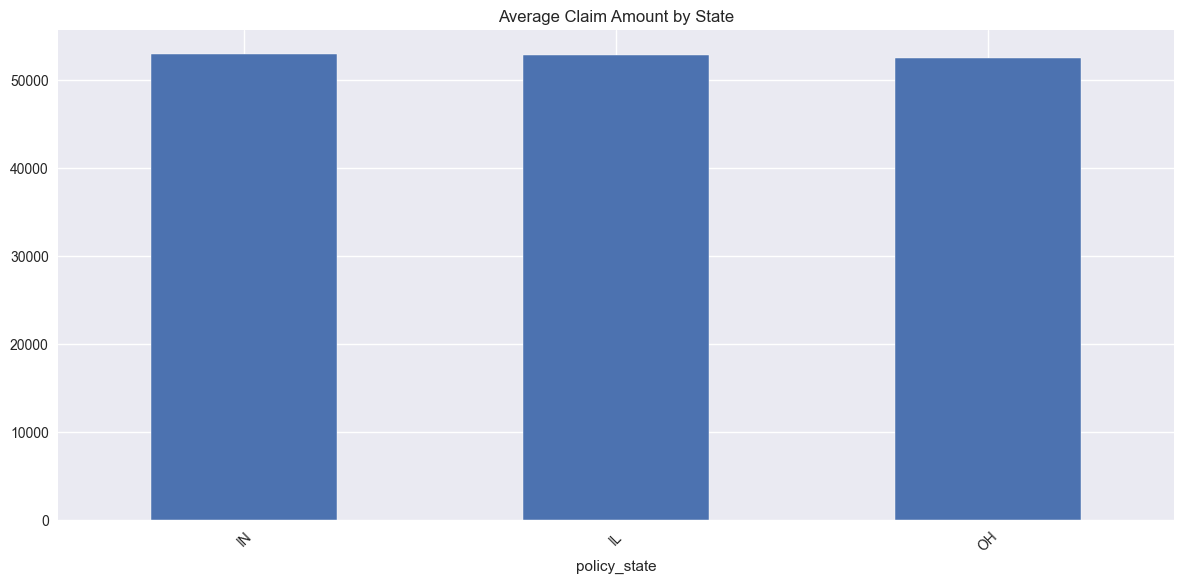

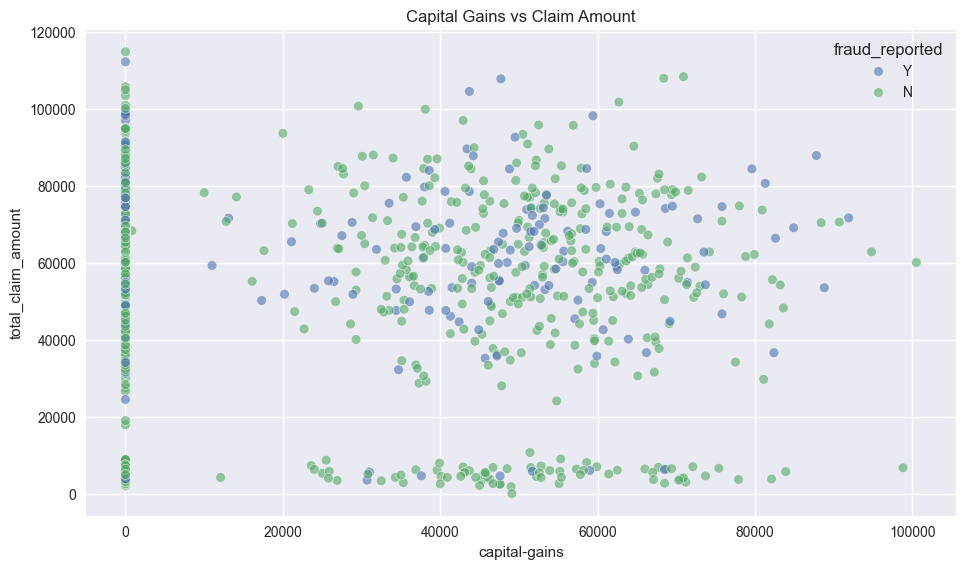

In [113]:
plt.figure(figsize=(12, 6))
# State-wise analysis
state_fraud = df.groupby('policy_state')['total_claim_amount'].mean().sort_values(ascending=False)
state_fraud.plot(kind='bar')
plt.title('Average Claim Amount by State')
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig('Average_Claim_Amount_by_State.png')
plt.show()

# Income proxy (capital gains/losses) vs claims
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='capital-gains', y='total_claim_amount', hue='fraud_reported', alpha=0.6)
plt.title('Capital Gains vs Claim Amount')
plt.savefig('Capital_Gains_vs_Claim_Amount.png')
plt.show()

In [114]:
print("\
Key Demographics Summary:")
print("States with highest average claims:", state_fraud.head(3).index.tolist())
print("Average age of fraudulent claims:", round(df[df['fraud_reported'] == 'Y']['age'].mean(), 2))
print("Most common education level in fraud cases:", df[df['fraud_reported'] == 'Y']['insured_education_level'].mode()[0])

Key Demographics Summary:
States with highest average claims: ['IN', 'IL', 'OH']
Average age of fraudulent claims: 39.14
Most common education level in fraud cases: JD


In [210]:
df.head()

,months_as_customer,age,policy_number,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,insured_sex,insured_education_level,insured_occupation,insured_hobbies,insured_relationship,capital-gains,capital-loss,incident_date,incident_type,collision_type,incident_severity,authorities_contacted,incident_state,incident_city,incident_location,incident_hour_of_the_day,number_of_vehicles_involved,property_damage,bodily_injuries,witnesses,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported,loss_ratio,profitability
0,328,48,521585,2014-10-17,OH,250/500,1000,1406.91,0,466132,MALE,MD,craft-repair,sleeping,husband,53300,0,2015-01-25,Single Vehicle Collision,Side Collision,Major Damage,Police,SC,Columbus,9935 4th Drive,5,1,YES,1,2,YES,71610,6510,13020,52080,Saab,92x,2004,Y,4.241565,-54727.08
1,228,42,342868,2006-06-27,IN,250/500,2000,1197.22,5000000,468176,MALE,MD,machine-op-inspct,reading,other-relative,0,0,2015-01-21,Vehicle Theft,?,Minor Damage,Police,VA,Riverwood,6608 MLK Hwy,8,1,?,0,0,?,5070,780,780,3510,Mercedes,E400,2007,Y,0.352901,9296.64
2,134,29,687698,2000-09-06,OH,100/300,2000,1413.14,5000000,430632,FEMALE,PhD,sales,board-games,own-child,35100,0,2015-02-22,Multi-vehicle Collision,Rear Collision,Minor Damage,Police,NY,Columbus,7121 Francis Lane,7,3,NO,2,3,NO,34650,7700,3850,23100,Dodge,RAM,2007,N,2.043322,-17692.32
3,256,41,227811,1990-05-25,IL,250/500,2000,1415.74,6000000,608117,FEMALE,PhD,armed-forces,board-games,unmarried,48900,-62400,2015-01-10,Single Vehicle Collision,Front Collision,Major Damage,Police,OH,Arlington,6956 Maple Drive,5,1,?,1,2,NO,63400,6340,6340,50720,Chevrolet,Tahoe,2014,Y,3.731853,-46411.12
4,228,44,367455,2014-06-06,IL,500/1000,1000,1583.91,6000000,610706,MALE,Associate,sales,board-games,unmarried,66000,-46000,2015-02-17,Vehicle Theft,?,Minor Damage,NaN,NY,Arlington,3041 3rd Ave,20,1,NO,0,1,NO,6500,1300,650,4550,Accura,RSX,2009,N,0.341981,12506.92


In [211]:
# Handle missing values
# Replace '?' with NaN for consistency
df.replace('?', np.nan, inplace=True)

In [212]:
# Fill missing values in categorical columns with the mode
categorical_columns = df.select_dtypes(include=['object']).columns
for col in categorical_columns:
    df[col].fillna(df[col].mode()[0], inplace=True)

In [213]:
# Fill missing values in numerical columns with the median
numerical_columns = df.select_dtypes(include=['float64', 'int64']).columns
for col in numerical_columns:
    df[col].fillna(df[col].median(), inplace=True)


In [69]:
cd ..


C:\Users\Arpit Kadam\Desktop\Insurance-Fraud-Detection\research


In [70]:
cd research-text-files

C:\Users\Arpit Kadam\Desktop\Insurance-Fraud-Detection\research\research-text-files


In [72]:
# Verify missing values are handled
print("Missing values after handling:")
print(df.isnull().sum().sum())

with open('Missing_Values_After_Handling.txt', 'w') as f:
    f.write(f"Missing values after replacing '?' with NaN and filling with mode and median:\n")
    f.write(f"{df.isnull().sum().sum()}\n")
    f.write("\n" + "="*50 + "\n")

print("Missing values after handling saved to Missing_Values_After_Handling.txt")


Missing values after handling:
0
Missing values after handling saved to Missing_Values_After_Handling.txt


In [75]:
df.head(5)

,months_as_customer,age,policy_number,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,insured_sex,insured_education_level,insured_occupation,insured_hobbies,insured_relationship,capital-gains,capital-loss,incident_date,incident_type,collision_type,incident_severity,authorities_contacted,incident_state,incident_city,incident_location,incident_hour_of_the_day,number_of_vehicles_involved,property_damage,bodily_injuries,witnesses,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported
0,328,48,521585,2014-10-17,OH,250/500,1000,1406.91,0,466132,MALE,MD,craft-repair,sleeping,husband,53300,0,2015-01-25,Single Vehicle Collision,Side Collision,Major Damage,Police,SC,Columbus,9935 4th Drive,5,1,YES,1,2,YES,71610,6510,13020,52080,Saab,92x,2004,Y
1,228,42,342868,2006-06-27,IN,250/500,2000,1197.22,5000000,468176,MALE,MD,machine-op-inspct,reading,other-relative,0,0,2015-01-21,Vehicle Theft,Rear Collision,Minor Damage,Police,VA,Riverwood,6608 MLK Hwy,8,1,NO,0,0,NO,5070,780,780,3510,Mercedes,E400,2007,Y
2,134,29,687698,2000-09-06,OH,100/300,2000,1413.14,5000000,430632,FEMALE,PhD,sales,board-games,own-child,35100,0,2015-02-22,Multi-vehicle Collision,Rear Collision,Minor Damage,Police,NY,Columbus,7121 Francis Lane,7,3,NO,2,3,NO,34650,7700,3850,23100,Dodge,RAM,2007,N
3,256,41,227811,1990-05-25,IL,250/500,2000,1415.74,6000000,608117,FEMALE,PhD,armed-forces,board-games,unmarried,48900,-62400,2015-01-10,Single Vehicle Collision,Front Collision,Major Damage,Police,OH,Arlington,6956 Maple Drive,5,1,NO,1,2,NO,63400,6340,6340,50720,Chevrolet,Tahoe,2014,Y
4,228,44,367455,2014-06-06,IL,500/1000,1000,1583.91,6000000,610706,MALE,Associate,sales,board-games,unmarried,66000,-46000,2015-02-17,Vehicle Theft,Rear Collision,Minor Damage,Police,NY,Arlington,3041 3rd Ave,20,1,NO,0,1,NO,6500,1300,650,4550,Accura,RSX,2009,N


In [214]:
categorical_columns = df.select_dtypes(include=['object']).columns
len(categorical_columns)

19

In [215]:
df['policy_bind_date'] = pd.to_datetime(df['policy_bind_date'])
df['incident_date'] = pd.to_datetime(df['incident_date'])

In [216]:
categorical_columns = df.select_dtypes(include=['object']).columns
len(categorical_columns)

19

In [217]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 41 columns):
 #   Column                       Non-Null Count  Dtype         
---  ------                       --------------  -----         
 0   months_as_customer           1000 non-null   int64         
 1   age                          1000 non-null   int64         
 2   policy_number                1000 non-null   int64         
 3   policy_bind_date             1000 non-null   datetime64[ns]
 4   policy_state                 1000 non-null   object        
 5   policy_csl                   1000 non-null   object        
 6   policy_deductable            1000 non-null   int64         
 7   policy_annual_premium        1000 non-null   float64       
 8   umbrella_limit               1000 non-null   int64         
 9   insured_zip                  1000 non-null   int64         
 10  insured_sex                  1000 non-null   object        
 11  insured_education_level      1000 non-null  

In [218]:
# Age groups
df['age_group'] = pd.cut(df['age'], bins=[0, 25, 35, 45, 55, 100], labels=['18-25', '26-35', '36-45', '46-55', '55+'])

In [219]:
df['age_group'].unique()

['46-55', '36-45', '26-35', '55+', '18-25']
Categories (5, object): ['18-25' < '26-35' < '36-45' < '46-55' < '55+']

In [220]:
df.head()

,months_as_customer,age,policy_number,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,insured_sex,insured_education_level,insured_occupation,insured_hobbies,insured_relationship,capital-gains,capital-loss,incident_date,incident_type,collision_type,incident_severity,authorities_contacted,incident_state,incident_city,incident_location,incident_hour_of_the_day,number_of_vehicles_involved,property_damage,bodily_injuries,witnesses,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported,loss_ratio,profitability,age_group
0,328,48,521585,2014-10-17,OH,250/500,1000,1406.91,0,466132,MALE,MD,craft-repair,sleeping,husband,53300,0,2015-01-25,Single Vehicle Collision,Side Collision,Major Damage,Police,SC,Columbus,9935 4th Drive,5,1,YES,1,2,YES,71610,6510,13020,52080,Saab,92x,2004,Y,4.241565,-54727.08,46-55
1,228,42,342868,2006-06-27,IN,250/500,2000,1197.22,5000000,468176,MALE,MD,machine-op-inspct,reading,other-relative,0,0,2015-01-21,Vehicle Theft,Rear Collision,Minor Damage,Police,VA,Riverwood,6608 MLK Hwy,8,1,NO,0,0,NO,5070,780,780,3510,Mercedes,E400,2007,Y,0.352901,9296.64,36-45
2,134,29,687698,2000-09-06,OH,100/300,2000,1413.14,5000000,430632,FEMALE,PhD,sales,board-games,own-child,35100,0,2015-02-22,Multi-vehicle Collision,Rear Collision,Minor Damage,Police,NY,Columbus,7121 Francis Lane,7,3,NO,2,3,NO,34650,7700,3850,23100,Dodge,RAM,2007,N,2.043322,-17692.32,26-35
3,256,41,227811,1990-05-25,IL,250/500,2000,1415.74,6000000,608117,FEMALE,PhD,armed-forces,board-games,unmarried,48900,-62400,2015-01-10,Single Vehicle Collision,Front Collision,Major Damage,Police,OH,Arlington,6956 Maple Drive,5,1,NO,1,2,NO,63400,6340,6340,50720,Chevrolet,Tahoe,2014,Y,3.731853,-46411.12,36-45
4,228,44,367455,2014-06-06,IL,500/1000,1000,1583.91,6000000,610706,MALE,Associate,sales,board-games,unmarried,66000,-46000,2015-02-17,Vehicle Theft,Rear Collision,Minor Damage,Police,NY,Arlington,3041 3rd Ave,20,1,NO,0,1,NO,6500,1300,650,4550,Accura,RSX,2009,N,0.341981,12506.92,36-45


In [221]:
df.drop('auto_year', axis=1, inplace=True)

In [222]:
df.head()

,months_as_customer,age,policy_number,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,insured_sex,insured_education_level,insured_occupation,insured_hobbies,insured_relationship,capital-gains,capital-loss,incident_date,incident_type,collision_type,incident_severity,authorities_contacted,incident_state,incident_city,incident_location,incident_hour_of_the_day,number_of_vehicles_involved,property_damage,bodily_injuries,witnesses,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,fraud_reported,loss_ratio,profitability,age_group
0,328,48,521585,2014-10-17,OH,250/500,1000,1406.91,0,466132,MALE,MD,craft-repair,sleeping,husband,53300,0,2015-01-25,Single Vehicle Collision,Side Collision,Major Damage,Police,SC,Columbus,9935 4th Drive,5,1,YES,1,2,YES,71610,6510,13020,52080,Saab,92x,Y,4.241565,-54727.08,46-55
1,228,42,342868,2006-06-27,IN,250/500,2000,1197.22,5000000,468176,MALE,MD,machine-op-inspct,reading,other-relative,0,0,2015-01-21,Vehicle Theft,Rear Collision,Minor Damage,Police,VA,Riverwood,6608 MLK Hwy,8,1,NO,0,0,NO,5070,780,780,3510,Mercedes,E400,Y,0.352901,9296.64,36-45
2,134,29,687698,2000-09-06,OH,100/300,2000,1413.14,5000000,430632,FEMALE,PhD,sales,board-games,own-child,35100,0,2015-02-22,Multi-vehicle Collision,Rear Collision,Minor Damage,Police,NY,Columbus,7121 Francis Lane,7,3,NO,2,3,NO,34650,7700,3850,23100,Dodge,RAM,N,2.043322,-17692.32,26-35
3,256,41,227811,1990-05-25,IL,250/500,2000,1415.74,6000000,608117,FEMALE,PhD,armed-forces,board-games,unmarried,48900,-62400,2015-01-10,Single Vehicle Collision,Front Collision,Major Damage,Police,OH,Arlington,6956 Maple Drive,5,1,NO,1,2,NO,63400,6340,6340,50720,Chevrolet,Tahoe,Y,3.731853,-46411.12,36-45
4,228,44,367455,2014-06-06,IL,500/1000,1000,1583.91,6000000,610706,MALE,Associate,sales,board-games,unmarried,66000,-46000,2015-02-17,Vehicle Theft,Rear Collision,Minor Damage,Police,NY,Arlington,3041 3rd Ave,20,1,NO,0,1,NO,6500,1300,650,4550,Accura,RSX,N,0.341981,12506.92,36-45


In [121]:
pwd

'C:\\Users\\Arpit Kadam\\Desktop\\Insurance-Fraud-Detection\\research\\Visualization-Images'

In [122]:
cd ..


C:\Users\Arpit Kadam\Desktop\Insurance-Fraud-Detection\research


In [123]:
cd research-text-files


C:\Users\Arpit Kadam\Desktop\Insurance-Fraud-Detection\research\research-text-files


In [130]:
with open("Data Stats", "w") as f:
    f.write("Fraud Reported Distribution:\n")
    fraud_counts = df['fraud_reported'].value_counts()
    f.write(fraud_counts.to_string())
    f.write("\n")
    f.write("Average Premium by Fraud Status:\n")
    avg_premium = df.groupby('fraud_reported')['policy_annual_premium'].mean()
    f.write(avg_premium.to_string())
    f.write("\n")
    f.write("\
        Median Claim Amounts by Fraud Status:")
    f.write(df.groupby('fraud_reported')[['total_claim_amount', 'injury_claim', 
                                    'property_claim', 'vehicle_claim']].median().to_string())
    f.write("\n")
    f.write("\
        Median Loss Ratios by Fraud Status:")
    f.write(df.groupby('fraud_reported')['loss_ratio'].median().to_string())
    f.write("\n")
    f.write("\
        Premium vs Claims by Incident Severity:")
    severity_metrics = df.groupby('incident_severity').agg({
    'policy_annual_premium': 'mean',
    'total_claim_amount': 'mean',
    'fraud_reported': lambda x: (x == 'Y').mean() * 100
    }).round(2)
    f.write(severity_metrics.to_string())
    f.write("\n")
    f.write("\
        Deductible Analysis Table:")
    f.write(deductible_analysis.to_string())
    f.write("\n")
    f.write("\
        Profitability Analysis Table:")
    f.write(profitability_analysis.to_string())
    f.write("\n")
    f.write("\
        Key Statistics:")
    f.write("\
        Fraud Rate: " + str((df['fraud_reported'] == 'Y').mean() * 100) + "%")
    f.write("\n")
    f.write("\
        Most Common Incident Type: " + str(df['incident_type'].mode()[0]))
    f.write("\n")
    f.write("\
        Average Total Claim Amount: $" + str(round(df['total_claim_amount'].mean(), 2)))
    f.write("\n")
    f.write("\
        Average vehicle age: " + str(round(df['vehicle_age'].mean(), 2)) + " years")
    f.write("\n")
    f.write("\
        Correlation between premium and claims: " + str(round(df['policy_annual_premium'].corr(df['total_claim_amount']), 3)))
    f.write("\n")
    f.write("\
        Most risky occupation (fraud-wise): " + str(fraud_by_occupation.idxmax()))
    f.write("\n")
    f.write("\
        Key Demographics Summary:")
    f.write("\
        States with highest average claims:")
    f.write(str(state_fraud.head(3).index.tolist()))
    f.write("\n")
    f.write("\
        Average age of fraudulent claims:")
    f.write(str(round(df[df['fraud_reported'] == 'Y']['age'].mean(), 2)))
    f.write("\n")
    f.write("\
        Most common education level in fraud cases:")
    f.write(str(df[df['fraud_reported'] == 'Y']['insured_education_level'].mode()[0]))
    f.write("\n")
    f.write("*"*50)

print("Data Stats saved to Data Stats.txt")

Data Stats saved to Data Stats.txt


In [223]:
df.head()

,months_as_customer,age,policy_number,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,insured_sex,insured_education_level,insured_occupation,insured_hobbies,insured_relationship,capital-gains,capital-loss,incident_date,incident_type,collision_type,incident_severity,authorities_contacted,incident_state,incident_city,incident_location,incident_hour_of_the_day,number_of_vehicles_involved,property_damage,bodily_injuries,witnesses,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,fraud_reported,loss_ratio,profitability,age_group
0,328,48,521585,2014-10-17,OH,250/500,1000,1406.91,0,466132,MALE,MD,craft-repair,sleeping,husband,53300,0,2015-01-25,Single Vehicle Collision,Side Collision,Major Damage,Police,SC,Columbus,9935 4th Drive,5,1,YES,1,2,YES,71610,6510,13020,52080,Saab,92x,Y,4.241565,-54727.08,46-55
1,228,42,342868,2006-06-27,IN,250/500,2000,1197.22,5000000,468176,MALE,MD,machine-op-inspct,reading,other-relative,0,0,2015-01-21,Vehicle Theft,Rear Collision,Minor Damage,Police,VA,Riverwood,6608 MLK Hwy,8,1,NO,0,0,NO,5070,780,780,3510,Mercedes,E400,Y,0.352901,9296.64,36-45
2,134,29,687698,2000-09-06,OH,100/300,2000,1413.14,5000000,430632,FEMALE,PhD,sales,board-games,own-child,35100,0,2015-02-22,Multi-vehicle Collision,Rear Collision,Minor Damage,Police,NY,Columbus,7121 Francis Lane,7,3,NO,2,3,NO,34650,7700,3850,23100,Dodge,RAM,N,2.043322,-17692.32,26-35
3,256,41,227811,1990-05-25,IL,250/500,2000,1415.74,6000000,608117,FEMALE,PhD,armed-forces,board-games,unmarried,48900,-62400,2015-01-10,Single Vehicle Collision,Front Collision,Major Damage,Police,OH,Arlington,6956 Maple Drive,5,1,NO,1,2,NO,63400,6340,6340,50720,Chevrolet,Tahoe,Y,3.731853,-46411.12,36-45
4,228,44,367455,2014-06-06,IL,500/1000,1000,1583.91,6000000,610706,MALE,Associate,sales,board-games,unmarried,66000,-46000,2015-02-17,Vehicle Theft,Rear Collision,Minor Damage,Police,NY,Arlington,3041 3rd Ave,20,1,NO,0,1,NO,6500,1300,650,4550,Accura,RSX,N,0.341981,12506.92,36-45


In [224]:
df.select_dtypes(include=['object']).columns


Index(['policy_state', 'policy_csl', 'insured_sex', 'insured_education_level',
       'insured_occupation', 'insured_hobbies', 'insured_relationship',
       'incident_type', 'collision_type', 'incident_severity',
       'authorities_contacted', 'incident_state', 'incident_city',
       'incident_location', 'property_damage', 'police_report_available',
       'auto_make', 'auto_model', 'fraud_reported'],
      dtype='object')

In [225]:
df['policy_state'].unique()
df['policy_state'].value_counts()

policy_state
OH    352
IL    338
IN    310
Name: count, dtype: int64

In [226]:
df['policy_state'] = df['policy_state'].map({'OH':0,'IL':1,'IN':2}).astype(int)
df.head()

,months_as_customer,age,policy_number,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,insured_sex,insured_education_level,insured_occupation,insured_hobbies,insured_relationship,capital-gains,capital-loss,incident_date,incident_type,collision_type,incident_severity,authorities_contacted,incident_state,incident_city,incident_location,incident_hour_of_the_day,number_of_vehicles_involved,property_damage,bodily_injuries,witnesses,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,fraud_reported,loss_ratio,profitability,age_group
0,328,48,521585,2014-10-17,0,250/500,1000,1406.91,0,466132,MALE,MD,craft-repair,sleeping,husband,53300,0,2015-01-25,Single Vehicle Collision,Side Collision,Major Damage,Police,SC,Columbus,9935 4th Drive,5,1,YES,1,2,YES,71610,6510,13020,52080,Saab,92x,Y,4.241565,-54727.08,46-55
1,228,42,342868,2006-06-27,2,250/500,2000,1197.22,5000000,468176,MALE,MD,machine-op-inspct,reading,other-relative,0,0,2015-01-21,Vehicle Theft,Rear Collision,Minor Damage,Police,VA,Riverwood,6608 MLK Hwy,8,1,NO,0,0,NO,5070,780,780,3510,Mercedes,E400,Y,0.352901,9296.64,36-45
2,134,29,687698,2000-09-06,0,100/300,2000,1413.14,5000000,430632,FEMALE,PhD,sales,board-games,own-child,35100,0,2015-02-22,Multi-vehicle Collision,Rear Collision,Minor Damage,Police,NY,Columbus,7121 Francis Lane,7,3,NO,2,3,NO,34650,7700,3850,23100,Dodge,RAM,N,2.043322,-17692.32,26-35
3,256,41,227811,1990-05-25,1,250/500,2000,1415.74,6000000,608117,FEMALE,PhD,armed-forces,board-games,unmarried,48900,-62400,2015-01-10,Single Vehicle Collision,Front Collision,Major Damage,Police,OH,Arlington,6956 Maple Drive,5,1,NO,1,2,NO,63400,6340,6340,50720,Chevrolet,Tahoe,Y,3.731853,-46411.12,36-45
4,228,44,367455,2014-06-06,1,500/1000,1000,1583.91,6000000,610706,MALE,Associate,sales,board-games,unmarried,66000,-46000,2015-02-17,Vehicle Theft,Rear Collision,Minor Damage,Police,NY,Arlington,3041 3rd Ave,20,1,NO,0,1,NO,6500,1300,650,4550,Accura,RSX,N,0.341981,12506.92,36-45


In [227]:
df['fraud_reported'] = df['fraud_reported'].map({'Y':1,'N':0}).astype(int)

In [228]:
df['police_report_available'] = df['police_report_available'].map({'YES':1,'NO':0}).astype(int)
df['property_damage'] = df['property_damage'].map({'YES':1,'NO':0}).astype(int)

In [229]:
df.head()


,months_as_customer,age,policy_number,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,insured_sex,insured_education_level,insured_occupation,insured_hobbies,insured_relationship,capital-gains,capital-loss,incident_date,incident_type,collision_type,incident_severity,authorities_contacted,incident_state,incident_city,incident_location,incident_hour_of_the_day,number_of_vehicles_involved,property_damage,bodily_injuries,witnesses,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,fraud_reported,loss_ratio,profitability,age_group
0,328,48,521585,2014-10-17,0,250/500,1000,1406.91,0,466132,MALE,MD,craft-repair,sleeping,husband,53300,0,2015-01-25,Single Vehicle Collision,Side Collision,Major Damage,Police,SC,Columbus,9935 4th Drive,5,1,1,1,2,1,71610,6510,13020,52080,Saab,92x,1,4.241565,-54727.08,46-55
1,228,42,342868,2006-06-27,2,250/500,2000,1197.22,5000000,468176,MALE,MD,machine-op-inspct,reading,other-relative,0,0,2015-01-21,Vehicle Theft,Rear Collision,Minor Damage,Police,VA,Riverwood,6608 MLK Hwy,8,1,0,0,0,0,5070,780,780,3510,Mercedes,E400,1,0.352901,9296.64,36-45
2,134,29,687698,2000-09-06,0,100/300,2000,1413.14,5000000,430632,FEMALE,PhD,sales,board-games,own-child,35100,0,2015-02-22,Multi-vehicle Collision,Rear Collision,Minor Damage,Police,NY,Columbus,7121 Francis Lane,7,3,0,2,3,0,34650,7700,3850,23100,Dodge,RAM,0,2.043322,-17692.32,26-35
3,256,41,227811,1990-05-25,1,250/500,2000,1415.74,6000000,608117,FEMALE,PhD,armed-forces,board-games,unmarried,48900,-62400,2015-01-10,Single Vehicle Collision,Front Collision,Major Damage,Police,OH,Arlington,6956 Maple Drive,5,1,0,1,2,0,63400,6340,6340,50720,Chevrolet,Tahoe,1,3.731853,-46411.12,36-45
4,228,44,367455,2014-06-06,1,500/1000,1000,1583.91,6000000,610706,MALE,Associate,sales,board-games,unmarried,66000,-46000,2015-02-17,Vehicle Theft,Rear Collision,Minor Damage,Police,NY,Arlington,3041 3rd Ave,20,1,0,0,1,0,6500,1300,650,4550,Accura,RSX,0,0.341981,12506.92,36-45


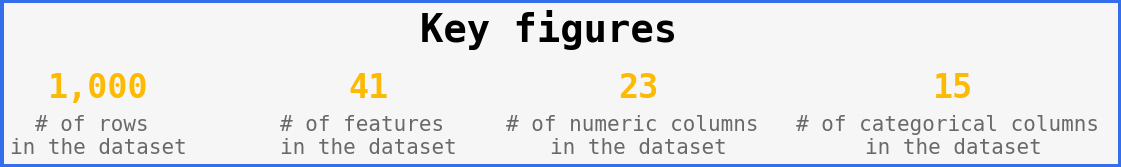

In [230]:
import matplotlib.pyplot as plt

# Reset matplotlib parameters to default
plt.rcParams.update(plt.rcParamsDefault)

# Count data types in the DataFrame
df_dtypes = df.dtypes.value_counts()

# Create a figure for displaying key figures
fig, ax = plt.subplots(figsize=(5, 2), facecolor='white')

# Define font style
font = 'monospace'

# Add text annotations for key figures
ax.text(1, 0.8, "Key figures", color='black', fontsize=28, fontweight='bold', fontfamily=font, ha='center')
ax.text(0, 0.4, f"{df.shape[0]:,d}", color='#fcba03', fontsize=24, fontweight='bold', fontfamily=font, ha='center')
ax.text(0, 0.001, "# of rows \nin the dataset", color='dimgrey', fontsize=15, fontweight='light', fontfamily=font, ha='center')
ax.text(0.6, 0.4, f"{df.shape[1]}", color='#fcba03', fontsize=24, fontweight='bold', fontfamily=font, ha='center')
ax.text(0.6, 0.001, "# of features \nin the dataset", color='dimgrey', fontsize=15, fontweight='light', fontfamily=font, ha='center')
ax.text(1.2, 0.4, f"{len(df.select_dtypes(np.number).columns)}", color='#fcba03', fontsize=24, fontweight='bold', fontfamily=font, ha='center')
ax.text(1.2, 0.001, "# of numeric columns \nin the dataset", color='dimgrey', fontsize=15, fontweight='light', fontfamily=font, ha='center')
ax.text(1.9, 0.4, f"{len(df.select_dtypes(object).columns)}", color='#fcba03', fontsize=24, fontweight='bold', fontfamily=font, ha='center')
ax.text(1.9, 0.001, "# of categorical columns \nin the dataset", color='dimgrey', fontsize=15, fontweight='light', fontfamily=font, ha='center')

# Remove axis ticks and labels
ax.set_yticklabels([])
ax.set_xticklabels([])
ax.tick_params(axis='y', length=0)
ax.tick_params(axis='x', length=0)

# Hide spines
for direction in ['top', 'right', 'left', 'bottom']:
    ax.spines[direction].set_visible(False)

# Adjust subplot parameters
fig.subplots_adjust(top=0.9, bottom=0.2, left=0, hspace=1)

# Set figure and axis background colors
fig.patch.set_linewidth(5)
fig.patch.set_edgecolor('#346eeb')
fig.patch.set_facecolor('#f6f6f6')
ax.set_facecolor('#f6f6f6')
# Display the plot
plt.show()

In [167]:
cd C:\Users\Arpit Kadam\Desktop\Insurance-Fraud-Detection\research\Visualization-Images

C:\Users\Arpit Kadam\Desktop\Insurance-Fraud-Detection\research\Visualization-Images


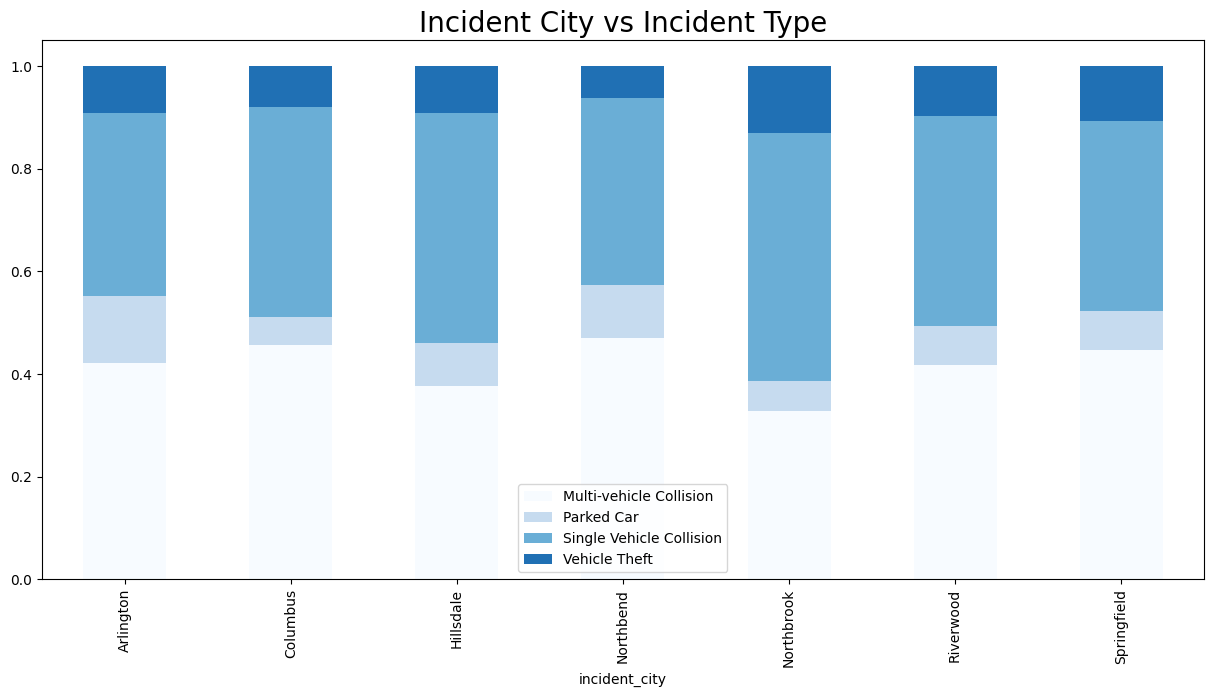

In [169]:
# Create cross tabulation of incident city and type
incident = pd.crosstab(df['incident_city'], df['incident_type'])

# Create color palette
colors = plt.cm.Blues(np.linspace(0, 1, 5))

# Plot normalized stacked bar chart
incident.div(incident.sum(1).astype(float), axis=0).plot(kind='bar',
                                                        stacked=True, 
                                                        figsize=(15, 7),
                                                        color=colors)

plt.title('Incident City vs Incident Type', fontsize = 20)
plt.legend()
plt.savefig('Incident_City_vs_Incident_Type.png')
plt.show()

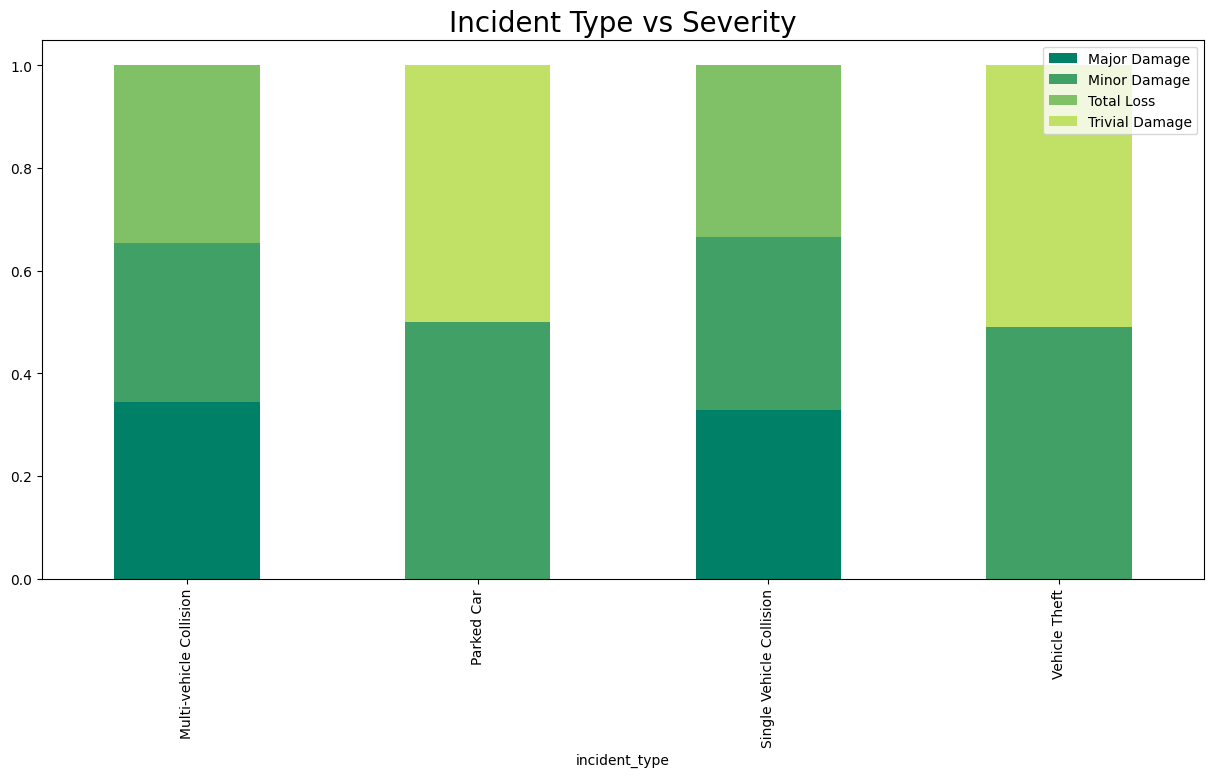

In [170]:
incident = pd.crosstab(df['incident_type'], df['incident_severity'])
colors = plt.cm.summer(np.linspace(0, 1, 5))
incident.div(incident.sum(1).astype(float), axis = 0).plot(kind = 'bar',
                                                           stacked = True,
                                                           figsize = (15, 7),
                                                           color = colors)

plt.title('Incident Type vs Severity', fontsize = 20)
plt.legend()
plt.savefig('Incident_Type_vs_Severity.png')
plt.show()

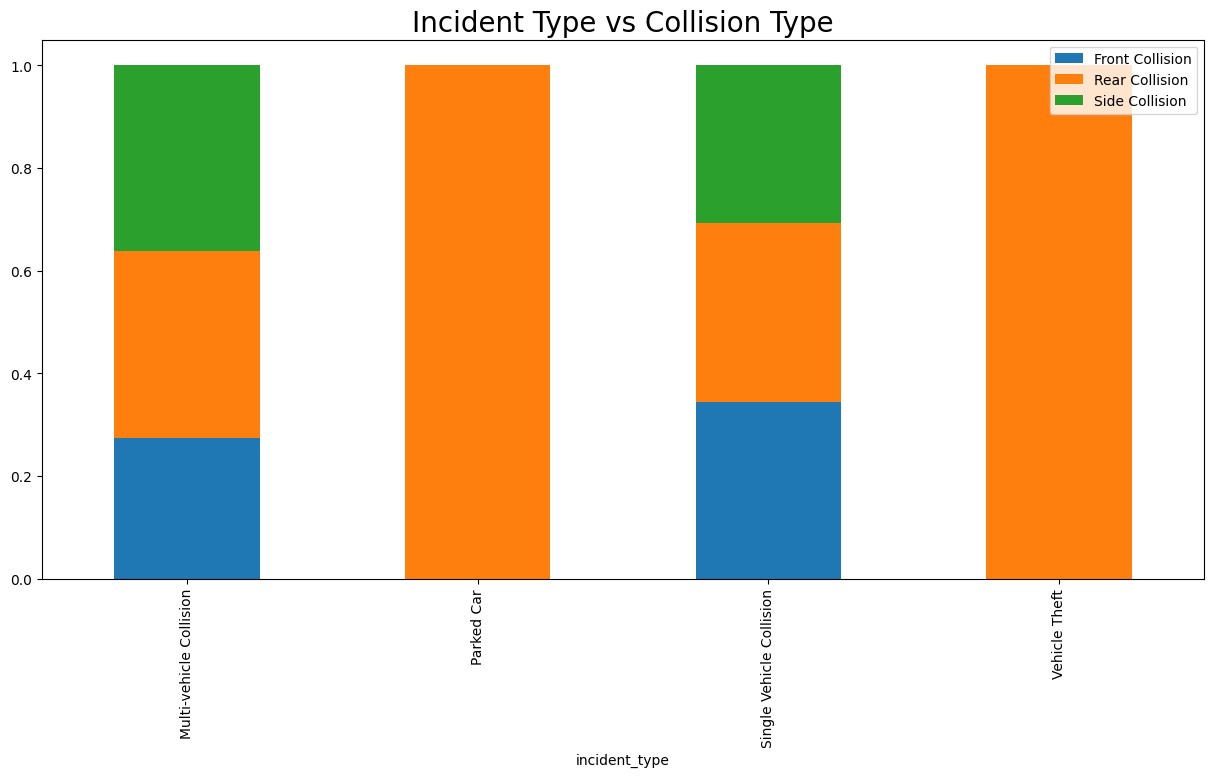

In [171]:
incident = pd.crosstab(df['incident_type'], df['collision_type'])
#colors = plt.cm.inferno(np.linspace(0, 1, 5))
incident.div(incident.sum(1).astype(float), axis = 0).plot(kind = 'bar',
                                                           stacked = True,
                                                           figsize = (15, 7))

plt.title('Incident Type vs Collision Type', fontsize = 20)
plt.legend()
plt.savefig('Incident_Type_vs_Collision_Type.png')
plt.show()

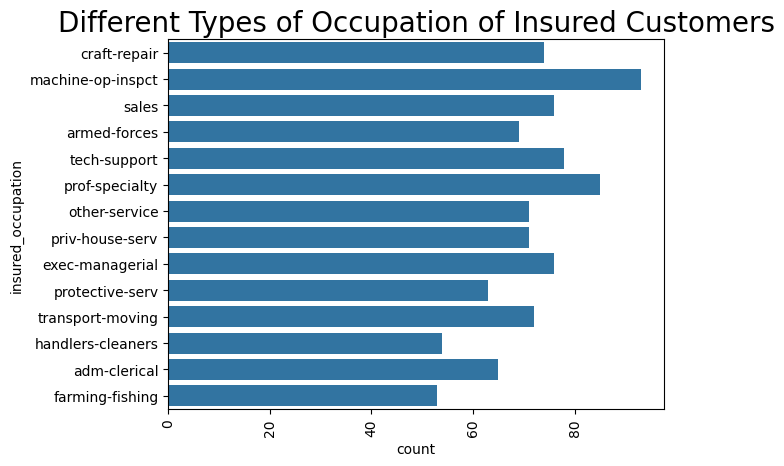

In [180]:
sns.countplot(df['insured_occupation'])
plt.title('Different Types of Occupation of Insured Customers', fontsize = 20)
plt.xticks(rotation = 90)
plt.savefig('Different_Types_of_Occupation_of_Insured_Customers.png')
plt.show()

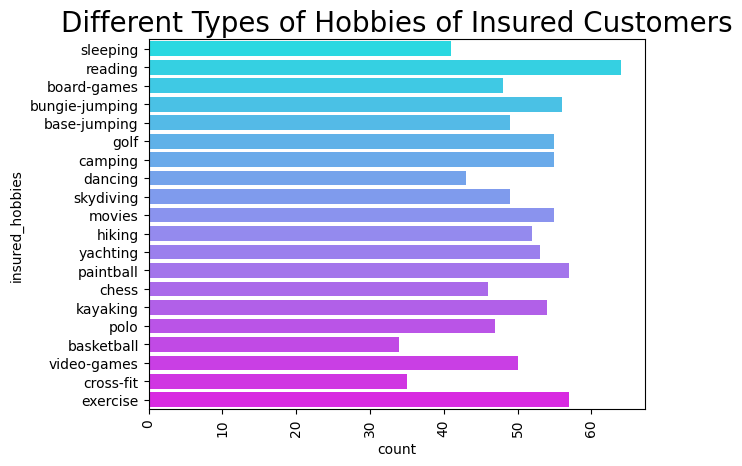

In [181]:
sns.countplot(df['insured_hobbies'], palette = 'cool')
plt.title('Different Types of Hobbies of Insured Customers', fontsize = 20)
plt.xticks(rotation = 90)
plt.savefig('Different_Types_of_Hobbies_of_Insured_Customers.png')
plt.show()  

In [231]:
df.head()

,months_as_customer,age,policy_number,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,insured_sex,insured_education_level,insured_occupation,insured_hobbies,insured_relationship,capital-gains,capital-loss,incident_date,incident_type,collision_type,incident_severity,authorities_contacted,incident_state,incident_city,incident_location,incident_hour_of_the_day,number_of_vehicles_involved,property_damage,bodily_injuries,witnesses,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,fraud_reported,loss_ratio,profitability,age_group
0,328,48,521585,2014-10-17,0,250/500,1000,1406.91,0,466132,MALE,MD,craft-repair,sleeping,husband,53300,0,2015-01-25,Single Vehicle Collision,Side Collision,Major Damage,Police,SC,Columbus,9935 4th Drive,5,1,1,1,2,1,71610,6510,13020,52080,Saab,92x,1,4.241565,-54727.08,46-55
1,228,42,342868,2006-06-27,2,250/500,2000,1197.22,5000000,468176,MALE,MD,machine-op-inspct,reading,other-relative,0,0,2015-01-21,Vehicle Theft,Rear Collision,Minor Damage,Police,VA,Riverwood,6608 MLK Hwy,8,1,0,0,0,0,5070,780,780,3510,Mercedes,E400,1,0.352901,9296.64,36-45
2,134,29,687698,2000-09-06,0,100/300,2000,1413.14,5000000,430632,FEMALE,PhD,sales,board-games,own-child,35100,0,2015-02-22,Multi-vehicle Collision,Rear Collision,Minor Damage,Police,NY,Columbus,7121 Francis Lane,7,3,0,2,3,0,34650,7700,3850,23100,Dodge,RAM,0,2.043322,-17692.32,26-35
3,256,41,227811,1990-05-25,1,250/500,2000,1415.74,6000000,608117,FEMALE,PhD,armed-forces,board-games,unmarried,48900,-62400,2015-01-10,Single Vehicle Collision,Front Collision,Major Damage,Police,OH,Arlington,6956 Maple Drive,5,1,0,1,2,0,63400,6340,6340,50720,Chevrolet,Tahoe,1,3.731853,-46411.12,36-45
4,228,44,367455,2014-06-06,1,500/1000,1000,1583.91,6000000,610706,MALE,Associate,sales,board-games,unmarried,66000,-46000,2015-02-17,Vehicle Theft,Rear Collision,Minor Damage,Police,NY,Arlington,3041 3rd Ave,20,1,0,0,1,0,6500,1300,650,4550,Accura,RSX,0,0.341981,12506.92,36-45


In [232]:
df.select_dtypes(include=['object']).columns


Index(['policy_csl', 'insured_sex', 'insured_education_level',
       'insured_occupation', 'insured_hobbies', 'insured_relationship',
       'incident_type', 'collision_type', 'incident_severity',
       'authorities_contacted', 'incident_state', 'incident_city',
       'incident_location', 'auto_make', 'auto_model'],
      dtype='object')

In [233]:
df['insured_sex'] = df['insured_sex'].map({'MALE':0,'FEMALE':1}).astype(int)

In [239]:
df['incident_type'].value_counts().sort_index()


incident_type
Multi-vehicle Collision     419
Parked Car                   84
Single Vehicle Collision    403
Vehicle Theft                94
Name: count, dtype: int64

In [244]:
df = pd.concat([df,pd.get_dummies(df['incident_type'],drop_first=True).astype(int)],axis=1)

In [246]:
df.drop('incident_type',axis=1,inplace=True)
df.head()


,months_as_customer,age,policy_number,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,insured_sex,insured_education_level,insured_occupation,insured_hobbies,insured_relationship,capital-gains,capital-loss,incident_date,collision_type,incident_severity,authorities_contacted,incident_state,incident_city,incident_location,incident_hour_of_the_day,number_of_vehicles_involved,property_damage,bodily_injuries,witnesses,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,fraud_reported,loss_ratio,profitability,age_group,Parked Car,Single Vehicle Collision,Vehicle Theft
0,328,48,521585,2014-10-17,0,250/500,1000,1406.91,0,466132,0,MD,craft-repair,sleeping,husband,53300,0,2015-01-25,Side Collision,Major Damage,Police,SC,Columbus,9935 4th Drive,5,1,1,1,2,1,71610,6510,13020,52080,Saab,92x,1,4.241565,-54727.08,46-55,0,1,0
1,228,42,342868,2006-06-27,2,250/500,2000,1197.22,5000000,468176,0,MD,machine-op-inspct,reading,other-relative,0,0,2015-01-21,Rear Collision,Minor Damage,Police,VA,Riverwood,6608 MLK Hwy,8,1,0,0,0,0,5070,780,780,3510,Mercedes,E400,1,0.352901,9296.64,36-45,0,0,1
2,134,29,687698,2000-09-06,0,100/300,2000,1413.14,5000000,430632,1,PhD,sales,board-games,own-child,35100,0,2015-02-22,Rear Collision,Minor Damage,Police,NY,Columbus,7121 Francis Lane,7,3,0,2,3,0,34650,7700,3850,23100,Dodge,RAM,0,2.043322,-17692.32,26-35,0,0,0
3,256,41,227811,1990-05-25,1,250/500,2000,1415.74,6000000,608117,1,PhD,armed-forces,board-games,unmarried,48900,-62400,2015-01-10,Front Collision,Major Damage,Police,OH,Arlington,6956 Maple Drive,5,1,0,1,2,0,63400,6340,6340,50720,Chevrolet,Tahoe,1,3.731853,-46411.12,36-45,0,1,0
4,228,44,367455,2014-06-06,1,500/1000,1000,1583.91,6000000,610706,0,Associate,sales,board-games,unmarried,66000,-46000,2015-02-17,Rear Collision,Minor Damage,Police,NY,Arlington,3041 3rd Ave,20,1,0,0,1,0,6500,1300,650,4550,Accura,RSX,0,0.341981,12506.92,36-45,0,0,1


In [247]:
df.select_dtypes(include=['object']).columns

Index(['policy_csl', 'insured_education_level', 'insured_occupation',
       'insured_hobbies', 'insured_relationship', 'collision_type',
       'incident_severity', 'authorities_contacted', 'incident_state',
       'incident_city', 'incident_location', 'auto_make', 'auto_model'],
      dtype='object')

In [248]:
df['collision_type'].value_counts().sort_index()

collision_type
Front Collision    254
Rear Collision     470
Side Collision     276
Name: count, dtype: int64

In [259]:
df['authorities_contacted'].value_counts().sort_index()

authorities_contacted
Ambulance    196
Fire         223
Other        198
Police       383
Name: count, dtype: int64

In [261]:
df['incident_severity'].value_counts().sort_index()

incident_severity
Major Damage      276
Minor Damage      354
Total Loss        280
Trivial Damage     90
Name: count, dtype: int64

In [262]:
df = pd.concat([df,pd.get_dummies(df['collision_type'],drop_first=True).astype(int)],axis=1)
df.drop('collision_type',axis=1,inplace=True)

In [263]:
df = pd.concat([df,pd.get_dummies(df['authorities_contacted'],drop_first=True).astype(int)],axis=1)
df.drop('authorities_contacted',axis=1,inplace=True)

In [264]:
df = pd.concat([df,pd.get_dummies(df['incident_severity'],drop_first=True).astype(int)],axis=1)
df.drop('incident_severity',axis=1,inplace=True)

In [265]:
df.head()

,months_as_customer,age,policy_number,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,insured_sex,insured_education_level,insured_occupation,insured_hobbies,insured_relationship,capital-gains,capital-loss,incident_date,incident_state,incident_city,incident_location,incident_hour_of_the_day,number_of_vehicles_involved,property_damage,bodily_injuries,witnesses,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,fraud_reported,loss_ratio,profitability,age_group,Parked Car,Single Vehicle Collision,Vehicle Theft,Rear Collision,Side Collision,Fire,Other,Police,Minor Damage,Total Loss,Trivial Damage
0,328,48,521585,2014-10-17,0,250/500,1000,1406.91,0,466132,0,MD,craft-repair,sleeping,husband,53300,0,2015-01-25,SC,Columbus,9935 4th Drive,5,1,1,1,2,1,71610,6510,13020,52080,Saab,92x,1,4.241565,-54727.08,46-55,0,1,0,0,1,0,0,1,0,0,0
1,228,42,342868,2006-06-27,2,250/500,2000,1197.22,5000000,468176,0,MD,machine-op-inspct,reading,other-relative,0,0,2015-01-21,VA,Riverwood,6608 MLK Hwy,8,1,0,0,0,0,5070,780,780,3510,Mercedes,E400,1,0.352901,9296.64,36-45,0,0,1,1,0,0,0,1,1,0,0
2,134,29,687698,2000-09-06,0,100/300,2000,1413.14,5000000,430632,1,PhD,sales,board-games,own-child,35100,0,2015-02-22,NY,Columbus,7121 Francis Lane,7,3,0,2,3,0,34650,7700,3850,23100,Dodge,RAM,0,2.043322,-17692.32,26-35,0,0,0,1,0,0,0,1,1,0,0
3,256,41,227811,1990-05-25,1,250/500,2000,1415.74,6000000,608117,1,PhD,armed-forces,board-games,unmarried,48900,-62400,2015-01-10,OH,Arlington,6956 Maple Drive,5,1,0,1,2,0,63400,6340,6340,50720,Chevrolet,Tahoe,1,3.731853,-46411.12,36-45,0,1,0,0,0,0,0,1,0,0,0
4,228,44,367455,2014-06-06,1,500/1000,1000,1583.91,6000000,610706,0,Associate,sales,board-games,unmarried,66000,-46000,2015-02-17,NY,Arlington,3041 3rd Ave,20,1,0,0,1,0,6500,1300,650,4550,Accura,RSX,0,0.341981,12506.92,36-45,0,0,1,1,0,0,0,1,1,0,0


In [266]:
df.select_dtypes(include=['object']).columns

Index(['policy_csl', 'insured_education_level', 'insured_occupation',
       'insured_hobbies', 'insured_relationship', 'incident_state',
       'incident_city', 'incident_location', 'auto_make', 'auto_model'],
      dtype='object')

In [267]:
df['policy_csl'].value_counts().sort_index()

policy_csl
100/300     349
250/500     351
500/1000    300
Name: count, dtype: int64

In [268]:
df = pd.concat([df,pd.get_dummies(df['policy_csl'],drop_first=True).astype(int)],axis=1)
df.drop('policy_csl',axis=1,inplace=True)

In [269]:
df.select_dtypes(include=['object']).columns

Index(['insured_education_level', 'insured_occupation', 'insured_hobbies',
       'insured_relationship', 'incident_state', 'incident_city',
       'incident_location', 'auto_make', 'auto_model'],
      dtype='object')

In [274]:
encoder = LabelEncoder()

In [277]:
df[df.select_dtypes(include=['object']).columns] = df[df.select_dtypes(include=['object']).columns].apply(encoder.fit_transform)
df.head()

,months_as_customer,age,policy_number,policy_bind_date,policy_state,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,insured_sex,insured_education_level,insured_occupation,insured_hobbies,insured_relationship,capital-gains,capital-loss,incident_date,incident_state,incident_city,incident_location,incident_hour_of_the_day,number_of_vehicles_involved,property_damage,bodily_injuries,witnesses,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,fraud_reported,loss_ratio,profitability,age_group,Parked Car,Single Vehicle Collision,Vehicle Theft,Rear Collision,Side Collision,Fire,Other,Police,Minor Damage,Total Loss,Trivial Damage,250/500,500/1000
0,328,48,521585,2014-10-17,0,1000,1406.91,0,466132,0,4,2,17,0,53300,0,2015-01-25,4,1,996,5,1,1,1,2,1,71610,6510,13020,52080,10,1,1,4.241565,-54727.08,46-55,0,1,0,0,1,0,0,1,0,0,0,1,0
1,228,42,342868,2006-06-27,2,2000,1197.22,5000000,468176,0,4,6,15,2,0,0,2015-01-21,5,5,628,8,1,0,0,0,0,5070,780,780,3510,8,12,1,0.352901,9296.64,36-45,0,0,1,1,0,0,0,1,1,0,0,1,0
2,134,29,687698,2000-09-06,0,2000,1413.14,5000000,430632,1,6,11,2,3,35100,0,2015-02-22,1,1,685,7,3,0,2,3,0,34650,7700,3850,23100,4,30,0,2.043322,-17692.32,26-35,0,0,0,1,0,0,0,1,1,0,0,0,0
3,256,41,227811,1990-05-25,1,2000,1415.74,6000000,608117,1,6,1,2,4,48900,-62400,2015-01-10,2,0,669,5,1,0,1,2,0,63400,6340,6340,50720,3,34,1,3.731853,-46411.12,36-45,0,1,0,0,0,0,0,1,0,0,0,1,0
4,228,44,367455,2014-06-06,1,1000,1583.91,6000000,610706,0,0,11,2,4,66000,-46000,2015-02-17,1,0,220,20,1,0,0,1,0,6500,1300,650,4550,0,31,0,0.341981,12506.92,36-45,0,0,1,1,0,0,0,1,1,0,0,0,1


In [279]:
df.head()


,months_as_customer,age,policy_number,policy_bind_date,policy_state,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,insured_sex,insured_education_level,insured_occupation,insured_hobbies,insured_relationship,capital-gains,capital-loss,incident_date,incident_state,incident_city,incident_location,incident_hour_of_the_day,number_of_vehicles_involved,property_damage,bodily_injuries,witnesses,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,fraud_reported,loss_ratio,profitability,age_group,Parked Car,Single Vehicle Collision,Vehicle Theft,Rear Collision,Side Collision,Fire,Other,Police,Minor Damage,Total Loss,Trivial Damage,250/500,500/1000
0,328,48,521585,2014-10-17,0,1000,1406.91,0,466132,0,4,2,17,0,53300,0,2015-01-25,4,1,996,5,1,1,1,2,1,71610,6510,13020,52080,10,1,1,4.241565,-54727.08,46-55,0,1,0,0,1,0,0,1,0,0,0,1,0
1,228,42,342868,2006-06-27,2,2000,1197.22,5000000,468176,0,4,6,15,2,0,0,2015-01-21,5,5,628,8,1,0,0,0,0,5070,780,780,3510,8,12,1,0.352901,9296.64,36-45,0,0,1,1,0,0,0,1,1,0,0,1,0
2,134,29,687698,2000-09-06,0,2000,1413.14,5000000,430632,1,6,11,2,3,35100,0,2015-02-22,1,1,685,7,3,0,2,3,0,34650,7700,3850,23100,4,30,0,2.043322,-17692.32,26-35,0,0,0,1,0,0,0,1,1,0,0,0,0
3,256,41,227811,1990-05-25,1,2000,1415.74,6000000,608117,1,6,1,2,4,48900,-62400,2015-01-10,2,0,669,5,1,0,1,2,0,63400,6340,6340,50720,3,34,1,3.731853,-46411.12,36-45,0,1,0,0,0,0,0,1,0,0,0,1,0
4,228,44,367455,2014-06-06,1,1000,1583.91,6000000,610706,0,0,11,2,4,66000,-46000,2015-02-17,1,0,220,20,1,0,0,1,0,6500,1300,650,4550,0,31,0,0.341981,12506.92,36-45,0,0,1,1,0,0,0,1,1,0,0,0,1


In [280]:
df['incident_year'] = df['incident_date'].dt.year
df['incident_month'] = df['incident_date'].dt.month
df['incident_day'] = df['incident_date'].dt.day
df.drop('incident_date',axis=1,inplace=True)
df.head()

,months_as_customer,age,policy_number,policy_bind_date,policy_state,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,insured_sex,insured_education_level,insured_occupation,insured_hobbies,insured_relationship,capital-gains,capital-loss,incident_state,incident_city,incident_location,incident_hour_of_the_day,number_of_vehicles_involved,property_damage,bodily_injuries,witnesses,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,fraud_reported,loss_ratio,profitability,age_group,Parked Car,Single Vehicle Collision,Vehicle Theft,Rear Collision,Side Collision,Fire,Other,Police,Minor Damage,Total Loss,Trivial Damage,250/500,500/1000,incident_year,incident_month,incident_day
0,328,48,521585,2014-10-17,0,1000,1406.91,0,466132,0,4,2,17,0,53300,0,4,1,996,5,1,1,1,2,1,71610,6510,13020,52080,10,1,1,4.241565,-54727.08,46-55,0,1,0,0,1,0,0,1,0,0,0,1,0,2015,1,25
1,228,42,342868,2006-06-27,2,2000,1197.22,5000000,468176,0,4,6,15,2,0,0,5,5,628,8,1,0,0,0,0,5070,780,780,3510,8,12,1,0.352901,9296.64,36-45,0,0,1,1,0,0,0,1,1,0,0,1,0,2015,1,21
2,134,29,687698,2000-09-06,0,2000,1413.14,5000000,430632,1,6,11,2,3,35100,0,1,1,685,7,3,0,2,3,0,34650,7700,3850,23100,4,30,0,2.043322,-17692.32,26-35,0,0,0,1,0,0,0,1,1,0,0,0,0,2015,2,22
3,256,41,227811,1990-05-25,1,2000,1415.74,6000000,608117,1,6,1,2,4,48900,-62400,2,0,669,5,1,0,1,2,0,63400,6340,6340,50720,3,34,1,3.731853,-46411.12,36-45,0,1,0,0,0,0,0,1,0,0,0,1,0,2015,1,10
4,228,44,367455,2014-06-06,1,1000,1583.91,6000000,610706,0,0,11,2,4,66000,-46000,1,0,220,20,1,0,0,1,0,6500,1300,650,4550,0,31,0,0.341981,12506.92,36-45,0,0,1,1,0,0,0,1,1,0,0,0,1,2015,2,17


In [290]:
df['age_group'] = encoder.fit_transform(df['age_group'])

In [291]:
df.head()

,months_as_customer,age,policy_number,policy_bind_date,policy_state,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,insured_sex,insured_education_level,insured_occupation,insured_hobbies,insured_relationship,capital-gains,capital-loss,incident_state,incident_city,incident_location,incident_hour_of_the_day,number_of_vehicles_involved,property_damage,bodily_injuries,witnesses,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,fraud_reported,loss_ratio,profitability,age_group,Parked Car,Single Vehicle Collision,Vehicle Theft,Rear Collision,Side Collision,Fire,Other,Police,Minor Damage,Total Loss,Trivial Damage,250/500,500/1000,incident_year,incident_month,incident_day
0,328,48,521585,2014-10-17,0,1000,1406.91,0,466132,0,4,2,17,0,53300,0,4,1,996,5,1,1,1,2,1,71610,6510,13020,52080,10,1,1,4.241565,-54727.08,3,0,1,0,0,1,0,0,1,0,0,0,1,0,2015,1,25
1,228,42,342868,2006-06-27,2,2000,1197.22,5000000,468176,0,4,6,15,2,0,0,5,5,628,8,1,0,0,0,0,5070,780,780,3510,8,12,1,0.352901,9296.64,2,0,0,1,1,0,0,0,1,1,0,0,1,0,2015,1,21
2,134,29,687698,2000-09-06,0,2000,1413.14,5000000,430632,1,6,11,2,3,35100,0,1,1,685,7,3,0,2,3,0,34650,7700,3850,23100,4,30,0,2.043322,-17692.32,1,0,0,0,1,0,0,0,1,1,0,0,0,0,2015,2,22
3,256,41,227811,1990-05-25,1,2000,1415.74,6000000,608117,1,6,1,2,4,48900,-62400,2,0,669,5,1,0,1,2,0,63400,6340,6340,50720,3,34,1,3.731853,-46411.12,2,0,1,0,0,0,0,0,1,0,0,0,1,0,2015,1,10
4,228,44,367455,2014-06-06,1,1000,1583.91,6000000,610706,0,0,11,2,4,66000,-46000,1,0,220,20,1,0,0,1,0,6500,1300,650,4550,0,31,0,0.341981,12506.92,2,0,0,1,1,0,0,0,1,1,0,0,0,1,2015,2,17


In [292]:
df['policy_bind_date'] = pd.to_datetime(df['policy_bind_date'], errors='coerce')
df['policy_bind_year'] = df['policy_bind_date'].dt.year
df['policy_bind_month'] = df['policy_bind_date'].dt.month
df['policy_bind_day'] = df['policy_bind_date'].dt.day
df.drop('policy_bind_date',axis=1,inplace=True) 

In [293]:
df.head()

,months_as_customer,age,policy_number,policy_state,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,insured_sex,insured_education_level,insured_occupation,insured_hobbies,insured_relationship,capital-gains,capital-loss,incident_state,incident_city,incident_location,incident_hour_of_the_day,number_of_vehicles_involved,property_damage,bodily_injuries,witnesses,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,fraud_reported,loss_ratio,profitability,age_group,Parked Car,Single Vehicle Collision,Vehicle Theft,Rear Collision,Side Collision,Fire,Other,Police,Minor Damage,Total Loss,Trivial Damage,250/500,500/1000,incident_year,incident_month,incident_day,policy_bind_year,policy_bind_month,policy_bind_day
0,328,48,521585,0,1000,1406.91,0,466132,0,4,2,17,0,53300,0,4,1,996,5,1,1,1,2,1,71610,6510,13020,52080,10,1,1,4.241565,-54727.08,3,0,1,0,0,1,0,0,1,0,0,0,1,0,2015,1,25,2014,10,17
1,228,42,342868,2,2000,1197.22,5000000,468176,0,4,6,15,2,0,0,5,5,628,8,1,0,0,0,0,5070,780,780,3510,8,12,1,0.352901,9296.64,2,0,0,1,1,0,0,0,1,1,0,0,1,0,2015,1,21,2006,6,27
2,134,29,687698,0,2000,1413.14,5000000,430632,1,6,11,2,3,35100,0,1,1,685,7,3,0,2,3,0,34650,7700,3850,23100,4,30,0,2.043322,-17692.32,1,0,0,0,1,0,0,0,1,1,0,0,0,0,2015,2,22,2000,9,6
3,256,41,227811,1,2000,1415.74,6000000,608117,1,6,1,2,4,48900,-62400,2,0,669,5,1,0,1,2,0,63400,6340,6340,50720,3,34,1,3.731853,-46411.12,2,0,1,0,0,0,0,0,1,0,0,0,1,0,2015,1,10,1990,5,25
4,228,44,367455,1,1000,1583.91,6000000,610706,0,0,11,2,4,66000,-46000,1,0,220,20,1,0,0,1,0,6500,1300,650,4550,0,31,0,0.341981,12506.92,2,0,0,1,1,0,0,0,1,1,0,0,0,1,2015,2,17,2014,6,6


In [294]:
df.select_dtypes(include=['object']).columns

Index([], dtype='object')

In [296]:
class_imbalance = df['fraud_reported'].value_counts()
class_imbalance

fraud_reported
0    753
1    247
Name: count, dtype: int64

In [298]:
# Separate the majority and minority classes
majority_class = df[df['fraud_reported'] == 0]
minority_class = df[df['fraud_reported'] == 1]

# Perform undersampling on the majority class
majority_downsampled = resample(majority_class, 
                                replace=False, 
                                n_samples=500,  # Reduce to 500 samples
                                random_state=42)

# Perform oversampling on the minority class
minority_oversampled = resample(minority_class, 
                                replace=True, 
                                n_samples=500,  # Increase to 500 samples
                                random_state=42)

# Combine the balanced classes
balanced_df = pd.concat([majority_downsampled, minority_oversampled])

# Shuffle the dataset
balanced_df = balanced_df.sample(frac=1, random_state=42).reset_index(drop=True)

In [299]:
balanced_df['fraud_reported'].value_counts()


fraud_reported
1    500
0    500
Name: count, dtype: int64

In [300]:
balanced_df.shape

(1000, 53)

In [304]:
balanced_df.head()

,months_as_customer,age,policy_number,policy_state,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,insured_sex,insured_education_level,insured_occupation,insured_hobbies,insured_relationship,capital-gains,capital-loss,incident_state,incident_city,incident_location,incident_hour_of_the_day,number_of_vehicles_involved,property_damage,bodily_injuries,witnesses,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,fraud_reported,loss_ratio,profitability,age_group,Parked Car,Single Vehicle Collision,Vehicle Theft,Rear Collision,Side Collision,Fire,Other,Police,Minor Damage,Total Loss,Trivial Damage,250/500,500/1000,incident_year,incident_month,incident_day,policy_bind_year,policy_bind_month,policy_bind_day
0,125,35,442795,0,500,1054.83,7000000,446788,0,3,12,6,0,0,-51300,1,3,842,17,1,1,2,3,0,88660,8060,16120,64480,8,7,1,7.004288,-76002.04,1,0,1,0,0,0,1,0,0,0,1,0,0,1,2015,2,25,1996,7,7
1,123,28,137675,1,2000,1836.02,0,470559,0,5,13,12,3,38000,-41200,0,5,371,5,1,0,2,1,1,79800,13300,6650,59850,13,28,1,3.621965,-57767.76,1,0,1,0,0,1,0,0,0,0,0,0,0,0,2015,1,1,2012,12,3
2,136,32,686522,2,500,1169.62,0,458143,1,3,11,19,1,0,0,4,0,787,6,1,1,0,0,0,55000,10000,10000,35000,12,9,1,3.918652,-40964.56,1,0,1,0,0,1,0,0,1,0,0,0,0,0,2015,2,4,2000,12,27
3,203,38,155724,1,500,1394.43,0,606352,1,5,7,16,1,0,0,5,1,458,7,1,0,0,1,1,55440,0,6160,49280,9,26,1,3.313182,-38706.84,2,0,1,0,0,0,0,0,0,0,0,0,1,0,2015,1,31,1998,2,20
4,43,38,149467,0,1000,1601.47,0,465764,0,6,5,16,2,64400,0,4,1,207,1,3,1,2,2,0,61650,6850,6850,47950,9,35,0,3.207990,-42432.36,2,0,0,0,0,0,0,1,0,0,1,0,0,1,2015,2,15,2014,3,11


In [307]:
balanced_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 53 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   months_as_customer           1000 non-null   int64  
 1   age                          1000 non-null   int64  
 2   policy_number                1000 non-null   int64  
 3   policy_state                 1000 non-null   int64  
 4   policy_deductable            1000 non-null   int64  
 5   policy_annual_premium        1000 non-null   float64
 6   umbrella_limit               1000 non-null   int64  
 7   insured_zip                  1000 non-null   int64  
 8   insured_sex                  1000 non-null   int64  
 9   insured_education_level      1000 non-null   int64  
 10  insured_occupation           1000 non-null   int64  
 11  insured_hobbies              1000 non-null   int64  
 12  insured_relationship         1000 non-null   int64  
 13  capital-gains      

In [324]:
cd C:\Users\Arpit Kadam\Desktop\Insurance-Fraud-Detection\research\Research-Text-Files

C:\Users\Arpit Kadam\Desktop\Insurance-Fraud-Detection\research\Research-Text-Files


In [325]:
from io import StringIO

with open('Balanced_Data_Info.txt','w') as f:
    f.write("First 5 rows of Balanced Data:")
    f.write(balanced_df.head().to_string())
    f.write("\n")
    f.write("Balanced Data Info:\n")
    buffer = StringIO()
    balanced_df.info(buf=buffer)
    f.write(buffer.getvalue())
    f.write("\n")
    f.write("Balanced Data Shape:\n")
    f.write(str(balanced_df.shape))
    f.write("\n")
    f.write("Balanced Data Columns:\n")
    f.write(str(balanced_df.columns))
    f.write("\n")
    f.write("Balanced Data Description:\n")
    f.write(balanced_df.describe().to_string())
    f.write("\n")
    f.write("Balanced Data Value Counts:\n")
    f.write(balanced_df['fraud_reported'].value_counts().to_string())
    f.write("\n")
    f.write("*"*50)

print("Balanced Data Info saved to Balanced_Data_Info.txt")


Balanced Data Info saved to Balanced_Data_Info.txt


In [313]:
numerical_columns = balanced_df.select_dtypes(include=['int64', 'int32', 'float64']).columns
numerical_columns

Index(['months_as_customer', 'age', 'policy_number', 'policy_state',
       'policy_deductable', 'policy_annual_premium', 'umbrella_limit',
       'insured_zip', 'insured_sex', 'insured_education_level',
       'insured_occupation', 'insured_hobbies', 'insured_relationship',
       'capital-gains', 'capital-loss', 'incident_state', 'incident_city',
       'incident_location', 'incident_hour_of_the_day',
       'number_of_vehicles_involved', 'property_damage', 'bodily_injuries',
       'witnesses', 'police_report_available', 'total_claim_amount',
       'injury_claim', 'property_claim', 'vehicle_claim', 'auto_make',
       'auto_model', 'fraud_reported', 'loss_ratio', 'profitability',
       'age_group', 'Parked Car', 'Single Vehicle Collision', 'Vehicle Theft',
       'Rear Collision', 'Side Collision', 'Fire', 'Other', 'Police',
       'Minor Damage', 'Total Loss', 'Trivial Damage', '250/500', '500/1000',
       'incident_year', 'incident_month', 'incident_day', 'policy_bind_year',
  

In [314]:
x = balanced_df[numerical_columns].drop(['fraud_reported'], axis=1)
y = balanced_df['fraud_reported']

print("X shape: ", x.shape)
print("Y shape: ", y.shape)

X shape:  (1000, 52)
Y shape:  (1000,)


In [315]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

print("X_train shape: ", x_train.shape)
print("X_test shape: ", x_test.shape)
print("Y_train shape: ", y_train.shape)
print("Y_test shape: ", y_test.shape)

X_train shape:  (800, 52)
X_test shape:  (200, 52)
Y_train shape:  (800,)
Y_test shape:  (200,)


In [316]:
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)

In [329]:
with open('Scaled_Data_Info.txt','w') as f:
    f.write("X_train first 5 rows:\n")
    f.write(str(x_train_scaled[:5, :10]))
    f.write("\n")
    f.write("X_test first 5 rows:\n") 
    f.write(str(x_test_scaled[:5, :10]))
    f.write("\n")
    f.write("Scaled Data Info:\n")
    f.write(str(x_train_scaled.shape))
    f.write("\n")
    f.write(str(x_test_scaled.shape))
    f.write("\n")
    f.write("*"*50)

print("Scaled Data Info saved to Scaled_Data_Info.txt")


Scaled Data Info saved to Scaled_Data_Info.txt
